In [171]:
import pandas as pd
import numpy as np
import seaborn as sns

### Specify the headers of the dataframes and load the csv into tow seperate data frames


In [172]:
# Correcting the headers lists: each column name should be a separate string within the list.
df1_headers = [
    "Station_ID", "Date_Time", "altimeter_set_1", "air_temp_set_1", "relative_humidity_set_1",
    "wind_speed_set_1", "wind_direction_set_1", "wind_gust_set_1", "solar_radiation_set_1",
    "precip_accum_24_hour_set_1", "precip_accum_since_local_midnight_set_1",
    "wind_chill_set_1d", "wind_cardinal_direction_set_1d", "heat_index_set_1d",
    "dew_point_temperature_set_1d", "pressure_set_1d", "sea_level_pressure_set_1d"
    # Make sure all headers are included and separated correctly
]

df2_headers = [
    "Station_ID", "Date_Time", "altimeter_set_1", "air_temp_set_1", "dew_point_temperature_set_1",
    "relative_humidity_set_1", "wind_speed_set_1", "wind_direction_set_1", "wind_gust_set_1",
    "sea_level_pressure_set_1", "weather_cond_code_set_1", "cloud_layer_3_code_set_1",
    "pressure_tendency_set_1", "precip_accum_one_hour_set_1", "precip_accum_three_hour_set_1",
    "cloud_layer_1_code_set_1", "cloud_layer_2_code_set_1", "precip_accum_six_hour_set_1",
    "precip_accum_24_hour_set_1", "visibility_set_1", "metar_remark_set_1", "metar_set_1",
    "air_temp_high_6_hour_set_1", "air_temp_low_6_hour_set_1", "peak_wind_speed_set_1",
    "ceiling_set_1", "pressure_change_code_set_1", "air_temp_high_24_hour_set_1",
    "air_temp_low_24_hour_set_1", "peak_wind_direction_set_1", "wind_chill_set_1d",
    "wind_cardinal_direction_set_1d", "heat_index_set_1d", "weather_condition_set_1d",
    "weather_summary_set_1d", "cloud_layer_1_set_1d", "cloud_layer_2_set_1d",
    "cloud_layer_3_set_1d", "dew_point_temperature_set_1d", "pressure_set_1d",
    "sea_level_pressure_set_1d"
    # Again, ensure all headers are separated correctly
]

# Read the CSV files with the corrected header alignment
df1 = pd.read_csv("G3425.csv", names=df1_headers, skiprows=8, index_col=False)
df2 = pd.read_csv("KHYI.csv", names=df2_headers, skiprows=8, index_col=False)
# Inspect the first few rows of the 'Date_Time' column
print(df1['Date_Time'].head())
print(df2['Date_Time'].head())

import pandas as pd

# Define a function to remove timezone information
def remove_timezone(dt_str):
    return dt_str[:-4]  # Adjust slicing based on your data format

# Apply this function to your 'Date_Time' columns
df1['Date_Time'] = df1['Date_Time'].apply(remove_timezone)
df2['Date_Time'] = df2['Date_Time'].apply(remove_timezone)

# Specify the format of your date-time strings
date_format = "%m/%d/%Y %H:%M"  # Adjust this format to match your data

# Convert 'Date_Time' to datetime
df1['Date_Time'] = pd.to_datetime(df1['Date_Time'], format=date_format, errors='coerce')
df2['Date_Time'] = pd.to_datetime(df2['Date_Time'], format=date_format, errors='coerce')

# Optional: Localize to a specific timezone if needed
# df1['Date_Time'] = df1['Date_Time'].dt.tz_localize('America/Chicago')
# df2['Date_Time'] = df2['Date_Time'].dt.tz_localize('UTC')

# Rename columns
df1.rename(columns={'Date_Time': 'timestamp'}, inplace=True)
df2.rename(columns={'Date_Time': 'timestamp'}, inplace=True)
df3 = pd.read_csv("Meadow Center Sensor Data Test.csv")
df3 = df3.drop(columns=['Month','Day','Year','Date'])
df3.rename(columns={'Taken At': 'timestamp'}, inplace=True)
df4 = pd.read_csv('usgs.waterservices.csv',skiprows=1)
df4.rename(columns={'20d': 'timestamp'}, inplace=True)
date_range = pd.date_range(start= '2022-06-11', end = '2023-06-11', freq='15S')
df3.rename(columns={'Temperature': 'Water Temperature'}, inplace=True)

final_df = pd.DataFrame(date_range, columns=['timestamp'])

0    05/03/2023 13:37 CDT
1    05/03/2023 13:47 CDT
2    05/03/2023 14:07 CDT
3    05/03/2023 14:47 CDT
4    05/03/2023 15:07 CDT
Name: Date_Time, dtype: object
0    06/11/2022 23:00 UTC
1    06/11/2022 23:05 UTC
2    06/11/2022 23:10 UTC
3    06/11/2022 23:15 UTC
4    06/11/2022 23:20 UTC
Name: Date_Time, dtype: object


### This function is used to reset the timezones in the dataset because the usgs and Sensor Data use UTC time zone

In [173]:
import pytz
dfs = [df1, df2, df3, df4]
# Function to parse datetime with different formats and timezones
def parse_datetime(dt):
    try:
        # Try parsing as is (if no timezone info, etc.)
        return pd.to_datetime(dt)
    except ValueError:
        # Handle entries with 'CDT' and 'UTC' separately
        if 'CDT' in dt:
            dt = dt.replace(' CDT', '')  # Remove 'CDT'
            parsed_dt = pd.to_datetime(dt, format='%m/%d/%Y %H:%M')  # Parse the datetime
            central = pytz.timezone('America/Chicago')
            return parsed_dt.tz_localize(central).tz_convert(pytz.utc).tz_localize(None)  # Convert to UTC and remove tz info
        elif 'UTC' in dt:
            dt = dt.replace(' UTC', '')  # Remove 'UTC'
            return pd.to_datetime(dt, format='%m/%d/%Y %H:%M')  # Parse the datetime
        else:
            # Custom parsing for other formats can be added here
            return pd.to_datetime(dt)  # Or a default return, if it's a format pandas can parse by default

# Iterate over all DataFrames
for dataframe in dfs:
    # Apply the conversion function to the 'Date_Time' column
    dataframe['timestamp'] = dataframe['timestamp'].apply(parse_datetime)

    # If you want to rename 'Date_Time' to 'timestamp', uncomment the following line
    # dataframe.rename(columns={'Date_Time': 'timestamp'}, inplace=True)

# Now, all your 'Date_Time' columns should have a unified format, and you can proceed with combining your DataFrames
# Iterate over all DataFrames
for dataframe in dfs:
    # Apply the conversion function to the 'Date_Time' column
    dataframe['timestamp'] = dataframe['timestamp'].apply(parse_datetime)

    # If you want to rename 'Date_Time' to 'timestamp', uncomment the following line
    #dataframe.rename(columns={'Date_Time': 'timestamp'}, inplace=True)

# Now, all your 'Date_Time' columns should have a unified format, and you can proceed with combining your DataFrames

In [174]:
df1['timestamp'] = df1['timestamp'].dt.tz_localize(None)
df2['timestamp'] = df2['timestamp'].dt.tz_localize(None)
df3['timestamp'] = df3['timestamp'].dt.tz_localize(None)
df4['timestamp'] = df4['timestamp'].dt.tz_localize(None)
df1.set_index('timestamp', inplace=True)
df2.set_index('timestamp', inplace=True)
df3.set_index('timestamp', inplace=True)
df4.set_index('timestamp', inplace=True)
dfs = [df1,df2]
merged_df = pd.concat(dfs, axis=0)
merged_df = pd.merge(merged_df, df3, on='timestamp', how='outer')
merged_df = pd.merge(merged_df, df4, on='timestamp', how='outer')
merged_df.reset_index(inplace=True)
final_df = merged_df
final_df = merged_df.drop(columns=['5s','15s','6s','10s'])

### This cell adds a feature column to the dataframe by dividing the lake into 2 sections, upstream and down stream. The dividing line is around Deep Hole and the Weather Station onsite.

In [175]:
#Divide into two clusters {Upstream and Downstream}
# a lat line between 29.89303 and 29.89310
# Dividing line coordinates
dividing_line = np.array([[29.89303, -97.932837], [29.89310, -97.932837]])

# Since the dividing line has the same longitude, we can cluster based on latitude.
# Points with latitude less than 29.89303 will be 'Downstream', greater will be 'Upstream'.
final_df['Cluster'] = np.where(final_df['Lat'] < dividing_line[0, 0], 'Downstream', 'Upstream')

In [176]:
final_df.set_index('timestamp', inplace=True)
final_df = final_df[~final_df.index.duplicated(keep='last')]
all_timestamps = pd.date_range(start='2022-06-11 00:00:00', end='2023-06-11 00:00:00', freq='15S')
final_df = final_df.reindex(all_timestamps, fill_value=pd.NA)
final_df.rename(columns={'index': 'timestamp'}, inplace=True)
final_df = final_df.rename(columns={'14n': 'Discharge Rate'})

In [177]:
#Current shape of Dataset
final_df.shape

(2102401, 48)

# Data Preprocessing
This cell is the first part for our linear interpolation. We take the mean of each column and have it as the first and last entry in each column

In [178]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame 'final_df'

# Iterating over each column in the DataFrame
for col_name in final_df.columns:
    # We're only interested in columns with numeric data
    if pd.api.types.is_numeric_dtype(final_df[col_name]):
        col_mean = final_df[col_name].mean()

        # If col_mean is not NaN, this means that there's at least one non-NaN value in the column
        if not np.isnan(col_mean):
            # Finding the first and last NaN indices in the column
            # We're specifically looking for NaN entries, not just any entry
            first_nan_index = final_df[col_name].index[final_df[col_name].isna()].min()
            last_nan_index = final_df[col_name].index[final_df[col_name].isna()].max()

            # Filling these specific NaN positions with the column mean, if they exist
            if first_nan_index is not np.nan:
                final_df.at[first_nan_index, col_name] = col_mean
            if last_nan_index is not np.nan:
                final_df.at[last_nan_index, col_name] = col_mean

# You can now check your DataFrame to see if the first and last NaNs were replaced appropriately.
final_df.head()

,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,...,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,Lat,Long,TDS,Water Temperature,Discharge Rate,Cluster
2022-06-11 00:00:00,NaN,30.012548,73.204991,68.73463,8.306313,153.281394,12.077422,210.451643,0.111647,0.078487,...,NaN,NaN,NaN,NaN,29.893364,-97.930973,426.075866,71.74583,116.000000,Upstream
2022-06-11 00:00:15,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.248803,<NA>
2022-06-11 00:00:30,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2022-06-11 00:00:45,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
2022-06-11 00:01:00,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


### This cell does forward linear interpolation for the dataset on numeric columns

In [179]:
# Linear interpolation for the numeric columns.
final_df.interpolate(method='linear', limit_direction='forward', inplace=True)

C:\Users\garre\AppData\Local\Temp\ipykernel_2780\2070673214.py:2: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



#### This cell is for the non-numeric columns, we do forward and backward filling for these columns

In [180]:
non_numeric_columns = final_df.select_dtypes(exclude='number').columns
final_df[non_numeric_columns] = final_df[non_numeric_columns].fillna(method='ffill')
final_df[non_numeric_columns] = final_df[non_numeric_columns].fillna(method='bfill')

C:\Users\garre\AppData\Local\Temp\ipykernel_2780\2580860926.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\garre\AppData\Local\Temp\ipykernel_2780\2580860926.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [181]:
final_df.head()

,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,...,weather_summary_set_1d,cloud_layer_1_set_1d,cloud_layer_2_set_1d,cloud_layer_3_set_1d,Lat,Long,TDS,Water Temperature,Discharge Rate,Cluster
2022-06-11 00:00:00,KHYI,30.012548,73.204991,68.734630,8.306313,153.281394,12.077422,210.451643,0.111647,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.075866,71.745830,116.000000,Upstream
2022-06-11 00:00:15,KHYI,30.012504,73.209917,68.728196,8.306894,153.282611,12.078243,210.451590,0.111668,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.073231,71.745853,92.248803,Upstream
2022-06-11 00:00:30,KHYI,30.012460,73.214844,68.721762,8.307474,153.283828,12.079063,210.451537,0.111690,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.070596,71.745875,92.634416,Upstream
2022-06-11 00:00:45,KHYI,30.012416,73.219771,68.715328,8.308055,153.285045,12.079884,210.451484,0.111712,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.067961,71.745898,93.020030,Upstream
2022-06-11 00:01:00,KHYI,30.012373,73.224697,68.708894,8.308635,153.286262,12.080704,210.451431,0.111734,0.078487,...,clear,NaN,NaN,NaN,29.893364,-97.930973,426.065326,71.745921,93.405643,Upstream


#### This cell checks if there are any more NaN values. And based on the output, this is probaly due to a bad merge on combining the dataframes into one large data frame. We drop these columns.

In [182]:
# Checking if there are any NaN values left in the DataFrame
nan_check = final_df.isna().sum().sum()

if nan_check == 0:
    print("There are no NaN values in the DataFrame.")
else:
    print(f"There are {nan_check} NaN values in the DataFrame.")
    # Optionally, to see the count of NaNs in each column:
    print("\nCount of NaN values in each column:")
    print(final_df.isna().sum())


There are 8409604 NaN values in the DataFrame.

Count of NaN values in each column:
Station_ID                                       0
altimeter_set_1                                  0
air_temp_set_1                                   0
relative_humidity_set_1                          0
wind_speed_set_1                                 0
wind_direction_set_1                             0
wind_gust_set_1                                  0
solar_radiation_set_1                            0
precip_accum_24_hour_set_1                       0
precip_accum_since_local_midnight_set_1          0
wind_chill_set_1d                                0
wind_cardinal_direction_set_1d                   0
heat_index_set_1d                                0
dew_point_temperature_set_1d                     0
pressure_set_1d                                  0
sea_level_pressure_set_1d                        0
dew_point_temperature_set_1                      0
sea_level_pressure_set_1                         

In [183]:
# This drops any column containing at least one NaN.
final_df = final_df.dropna(axis=1, how='any')
final_df.head()

,Station_ID,altimeter_set_1,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,solar_radiation_set_1,precip_accum_24_hour_set_1,precip_accum_since_local_midnight_set_1,...,air_temp_low_24_hour_set_1,peak_wind_direction_set_1,weather_condition_set_1d,weather_summary_set_1d,Lat,Long,TDS,Water Temperature,Discharge Rate,Cluster
2022-06-11 00:00:00,KHYI,30.012548,73.204991,68.734630,8.306313,153.281394,12.077422,210.451643,0.111647,0.078487,...,66.495161,209.487179,haze,clear,29.893364,-97.930973,426.075866,71.745830,116.000000,Upstream
2022-06-11 00:00:15,KHYI,30.012504,73.209917,68.728196,8.306894,153.282611,12.078243,210.451590,0.111668,0.078487,...,66.496198,209.484758,haze,clear,29.893364,-97.930973,426.073231,71.745853,92.248803,Upstream
2022-06-11 00:00:30,KHYI,30.012460,73.214844,68.721762,8.307474,153.283828,12.079063,210.451537,0.111690,0.078487,...,66.497234,209.482336,haze,clear,29.893364,-97.930973,426.070596,71.745875,92.634416,Upstream
2022-06-11 00:00:45,KHYI,30.012416,73.219771,68.715328,8.308055,153.285045,12.079884,210.451484,0.111712,0.078487,...,66.498270,209.479914,haze,clear,29.893364,-97.930973,426.067961,71.745898,93.020030,Upstream
2022-06-11 00:01:00,KHYI,30.012373,73.224697,68.708894,8.308635,153.286262,12.080704,210.451431,0.111734,0.078487,...,66.499307,209.477492,haze,clear,29.893364,-97.930973,426.065326,71.745921,93.405643,Upstream


#### Due to the inaccuracies with the sensor, these are the upper and lower bounds of what would be acceptable as TDS values in Spring Lake. We drop these rows that are out-of-bounds. We also print out the mean of TDS to check to make sure it's acceptable to what the average TDS yearly value is for lakes connected to the Edwards Quifier

In [184]:
final_df = final_df[(final_df['TDS'] >= 200) & (final_df['TDS'] <= 1000)]
print(final_df['TDS'].mean())

414.45872334768944


#### Due to the limited power of the computer we have and how large our dataset is, we are doing sampling to run our models

In [185]:
final_df_copy = final_df
final_df = final_df.sample(frac=0.005)
final_df.shape

(9454, 44)

# Dataset Stats
1. Heatmaps of the two variables we are interested in, TDS and Water Temperature
2. Histogram
3. Scatter plots, to see any trends and to identify noise

In [186]:
import plotly.express as px

# Assuming 'final_df' is your final dataframe
numeric_df = final_df.select_dtypes(include='number')
tds_corr = numeric_df.corr().loc[['TDS'], :]

# Create an interactive heatmap using Plotly
fig = px.imshow(tds_corr, 
                text_auto=True, # Automatically annotate cells
                aspect='auto',   # Flexible cell size
                color_continuous_scale='RdBu') # Red Blue colormap

# Update layout for side-scrolling
fig.update_layout(
    title='Interactive Heatmap of TDS Correlation',
    autosize=False,
    width=1000,  # Set a suitable width
    height=300,  # Set a suitable height
    xaxis_nticks=36,  # Adjust based on your dataset
    margin=dict(l=10, r=10, t=50, b=10)
)

# Update xaxis properties if needed
fig.update_xaxes(side="bottom")

# Display the heatmap
fig.show()


In [187]:
import plotly.express as px

# Assuming 'final_df' is your final dataframe
numeric_df = final_df.select_dtypes(include='number')
watertemp_corr = numeric_df.corr().loc[['Water Temperature'], :]

# Create an interactive heatmap using Plotly
fig = px.imshow(watertemp_corr, 
                text_auto=True, # Automatically annotate cells
                aspect='auto',   # Flexible cell size
                color_continuous_scale='RdBu') # Red Blue colormap

# Update layout for side-scrolling
fig.update_layout(
    title='Interactive Heatmap of TDS Correlation',
    autosize=False,
    width=1000,  # Set a suitable width
    height=300,  # Set a suitable height
    xaxis_nticks=36,  # Adjust based on your dataset
    margin=dict(l=10, r=10, t=50, b=10)
)

# Update xaxis properties if needed
fig.update_xaxes(side="bottom")

# Display the heatmap
fig.show()


# Models - All features, no hyperparameter tunining or cross validation
1. Decison Tree - Baseline
2. Random Forest - main model
3. FNN - Experiment
4. Gradient Boosting - Experiment
5. SVR - Experiment
6. Performance Graphs
7. Importance Features

In [188]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Step 1: Select numeric columns
numeric_columns = final_df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Remove 'TDS' and 'Water Temperature' if they are in numeric_columns
features_to_exclude = ['TDS', 'Water Temperature']
numeric_features = [col for col in numeric_columns if col not in features_to_exclude]

# Step 3: Use LabelEncoder to encode string columns
le = LabelEncoder()
encoded_columns = final_df.select_dtypes(include=['object']).apply(le.fit_transform)

# Step 4: Concatenate the encoded string columns back to the numeric DataFrame
X = pd.concat([final_df[numeric_features], encoded_columns], axis=1)
y = final_df[features_to_exclude]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Training the model
dt_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Computing the Mean Squared Error (MSE) for both outputs
mse_dt_tds = mean_squared_error(y_test['TDS'], y_pred_dt[:, 0])
mse_dt_temp = mean_squared_error(y_test['Water Temperature'], y_pred_dt[:, 1])

print(f"Decision Tree - Mean Squared Error for TDS: {mse_dt_tds}")
print(f"Decision Tree - Mean Squared Error for Water Temperature: {mse_dt_temp}")

# Compute the R^2 score for both outputs
r2_dt_tds = r2_score(y_test['TDS'], y_pred_dt[:, 0])
r2_dt_temp = r2_score(y_test['Water Temperature'], y_pred_dt[:, 1])

print(f"Decision Tree - R^2 Score for TDS: {r2_dt_tds}")
print(f"Decision Tree - R^2 Score for Water Temperature: {r2_dt_temp}")

# Compute the Mean Absolute Error (MAE) for both outputs
mae_dt_tds = mean_absolute_error(y_test['TDS'], y_pred_dt[:, 0])
mae_dt_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_dt[:, 1])

print(f"Decision Tree - Mean Absolute Error for TDS: {mae_dt_tds}")
print(f"Decision Tree - Mean Absolute Error for Water Temperature: {mae_dt_temp}")

# Compute the Root Mean Squared Error (RMSE) for both outputs
rmse_dt_tds = mean_squared_error(y_test['TDS'], y_pred_dt[:, 0], squared=False)
rmse_dt_temp = mean_squared_error(y_test['Water Temperature'], y_pred_dt[:, 1], squared=False)

print(f"Decision Tree - Root Mean Squared Error for TDS: {rmse_dt_tds}")
print(f"Decision Tree - Root Mean Squared Error for Water Temperature: {rmse_dt_temp}")


Decision Tree - Mean Squared Error for TDS: 19.968984614076554
Decision Tree - Mean Squared Error for Water Temperature: 0.12506715804035484
Decision Tree - R^2 Score for TDS: 0.9921878101051312
Decision Tree - R^2 Score for Water Temperature: 0.9823888909344011
Decision Tree - Mean Absolute Error for TDS: 0.8330772972839116
Decision Tree - Mean Absolute Error for Water Temperature: 0.1264939280817336
Decision Tree - Root Mean Squared Error for TDS: 4.468666984020688
Decision Tree - Root Mean Squared Error for Water Temperature: 0.35364835365141295


In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Assuming final_df is defined
# We'll simulate it here with random data for demonstration purposes

# Step 1: Select numeric columns
numeric_columns = final_df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Remove 'TDS' and 'Water Temperature' if they are in numeric_columns
features_to_exclude = ['TDS', 'Water Temperature']
numeric_features = [col for col in numeric_columns if col not in features_to_exclude]

# Step 3: Use LabelEncoder to encode string columns
le = LabelEncoder()
encoded_columns = final_df.select_dtypes(include=['object']).apply(le.fit_transform)

# Step 4: Concatenate the encoded string columns back to the numeric DataFrame
X = pd.concat([final_df[numeric_features], encoded_columns], axis=1)
y = final_df[features_to_exclude]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Training the model
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = regressor.predict(X_test)

# Computing the Mean Squared Error (MSE) for both outputs
mse_rf_tds = mean_squared_error(y_test['TDS'], y_pred_rf[:, 0])
mse_rf_temp = mean_squared_error(y_test['Water Temperature'], y_pred_rf[:, 1])

print(f"Mean Squared Error for TDS: {mse_rf_tds}")
print(f"Mean Squared Error for Water Temperature: {mse_rf_temp}")

# Compute the R^2 score for both outputs
r2_rf_tds = r2_score(y_test['TDS'], y_pred_rf[:, 0])
r2_rf_temp = r2_score(y_test['Water Temperature'], y_pred_rf[:, 1])

print(f"R^2 Score for TDS: {r2_rf_tds}")
print(f"R^2 Score for Water Temperature: {r2_rf_temp}")
# Compute the Mean Absolute Error (MAE) for both outputs
mae_rf_tds = mean_absolute_error(y_test['TDS'], y_pred_rf[:, 0])
mae_rf_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_rf[:, 1])

print(f"Mean Absolute Error for TDS: {mae_rf_tds}")
print(f"Mean Absolute Error for Water Temperature: {mae_rf_temp}")

# Compute the Root Mean Squared Error (RMSE) for both outputs
rmse_rf_tds = mean_squared_error(y_test['TDS'], y_pred_rf[:, 0], squared=False)
rmse_rf_temp = mean_squared_error(y_test['Water Temperature'], y_pred_rf[:, 1], squared=False)

print(f"Root Mean Squared Error for TDS: {rmse_rf_tds}")
print(f"Root Mean Squared Error for Water Temperature: {rmse_rf_temp}")


Mean Squared Error for TDS: 17.579862392292462
Mean Squared Error for Water Temperature: 0.049454153042294315
R^2 Score for TDS: 0.9931224733761655
R^2 Score for Water Temperature: 0.9930362015366685
Mean Absolute Error for TDS: 0.724783778359866
Mean Absolute Error for Water Temperature: 0.10454501950740386
Root Mean Squared Error for TDS: 4.192834648813672
Root Mean Squared Error for Water Temperature: 0.22238289736914194


In [190]:
!pip3 install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [191]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming final_df is defined
# We'll simulate it here with random data for demonstration purposes

# Step 1: Select numeric columns
numeric_columns = final_df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Remove 'TDS' and 'Water Temperature' if they are in numeric_columns
features_to_exclude = ['TDS', 'Water Temperature']
numeric_features = [col for col in numeric_columns if col not in features_to_exclude]

# Step 3: Use LabelEncoder to encode string columns
le = LabelEncoder()
encoded_columns = final_df.select_dtypes(include=['object']).apply(le.fit_transform)

# Step 4: Concatenate the encoded string columns back to the numeric DataFrame
X = pd.concat([final_df[numeric_features], encoded_columns], axis=1)
y = final_df[features_to_exclude]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Neural network architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2))  # Two output neurons for TDS and Water Temperature

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predicting on the test set
y_pred_fnn = model.predict(X_test)

# Computing the Mean Squared Error (MSE) for both outputs
mse_fnn_tds = mean_squared_error(y_test['TDS'], y_pred_fnn[:, 0])
mse_fnn_temp = mean_squared_error(y_test['Water Temperature'], y_pred_fnn[:, 1])

print(f"Mean Squared Error for TDS: {mse_fnn_tds}")
print(f"Mean Squared Error for Water Temperature: {mse_fnn_temp}")

# Compute the R^2 score for both outputs
r2_fnn_tds = r2_score(y_test['TDS'], y_pred_fnn[:, 0])
r2_fnn_temp = r2_score(y_test['Water Temperature'], y_pred_fnn[:, 1])

print(f"R^2 Score for TDS: {r2_fnn_tds}")
print(f"R^2 Score for Water Temperature: {r2_fnn_temp}")

# Compute the Mean Absolute Error (MAE) for both outputs
mae_fnn_tds = mean_absolute_error(y_test['TDS'], y_pred_fnn[:, 0])
mae_fnn_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_fnn[:, 1])

print(f"Mean Absolute Error for TDS: {mae_fnn_tds}")
print(f"Mean Absolute Error for Water Temperature: {mae_fnn_temp}")

# Compute the Root Mean Squared Error (RMSE) for both outputs
rmse_fnn_tds = mean_squared_error(y_test['TDS'], y_pred_fnn[:, 0], squared=False)
rmse_fnn_temp = mean_squared_error(y_test['Water Temperature'], y_pred_fnn[:, 1], squared=False)

print(f"Root Mean Squared Error for TDS: {rmse_fnn_tds}")
print(f"Root Mean Squared Error for Water Temperature: {rmse_fnn_temp}")

Epoch 1/100
207/207 [==============================] - 1s 2ms/step - loss: 17905.0137
Epoch 2/100
207/207 [==============================] - 0s 2ms/step - loss: 47049.2852
Epoch 3/100
207/207 [==============================] - 0s 2ms/step - loss: 54568.7852
Epoch 4/100
207/207 [==============================] - 0s 2ms/step - loss: 216664.2031
Epoch 5/100
207/207 [==============================] - 0s 2ms/step - loss: 102237.2734
Epoch 6/100
207/207 [==============================] - 0s 2ms/step - loss: 39199.1719
Epoch 7/100
207/207 [==============================] - 0s 2ms/step - loss: 19471.7852
Epoch 8/100
207/207 [==============================] - 0s 2ms/step - loss: 30238.8379
Epoch 9/100
207/207 [==============================] - 0s 2ms/step - loss: 18898.8848
Epoch 10/100
207/207 [==============================] - 0s 2ms/step - loss: 12438.0752
Epoch 11/100
207/207 [==============================] - 0s 2ms/step - loss: 17195.6836
Epoch 12/100
207/207 [============================

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Step 1: Select numeric columns
numeric_columns = final_df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Remove 'TDS' and 'Water Temperature' if they are in numeric_columns
features_to_exclude = ['TDS', 'Water Temperature']
numeric_features = [col for col in numeric_columns if col not in features_to_exclude]

# Step 3: Use LabelEncoder to encode string columns
le = LabelEncoder()
encoded_columns = final_df.select_dtypes(include=['object']).apply(le.fit_transform)

X = pd.concat([final_df[numeric_features], encoded_columns], axis=1)
y = final_df[features_to_exclude]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting for 'TDS' prediction
gb_model_tds = GradientBoostingRegressor()
y_train_tds = y_train['TDS']  # Select 'TDS' as the target variable
gb_model_tds.fit(X_train, y_train_tds)
y_pred_gb_tds = gb_model_tds.predict(X_test)

# Gradient Boosting for 'Water Temperature' prediction
gb_model_temp = GradientBoostingRegressor()
y_train_temp = y_train['Water Temperature']  # Select 'Water Temperature' as the target variable
gb_model_temp.fit(X_train, y_train_temp)
y_pred_gb_temp = gb_model_temp.predict(X_test)

# Computing the Mean Squared Error (MSE) for both outputs
mse_gb_tds = mean_squared_error(y_test['TDS'], y_pred_gb_tds)
mse_gb_temp = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp)

print(f"Mean Squared Error for TDS: {mse_gb_tds}")
print(f"Mean Squared Error for Water Temperature: {mse_gb_temp}")

# Compute the R^2 score for both outputs
r2_gb_tds = r2_score(y_test['TDS'], y_pred_gb_tds)
r2_gb_temp = r2_score(y_test['Water Temperature'], y_pred_gb_temp)

print(f"R^2 Score for TDS: {r2_gb_tds}")
print(f"R^2 Score for Water Temperature: {r2_gb_temp}")

# Compute the Mean Absolute Error (MAE) for both outputs
mae_gb_tds = mean_absolute_error(y_test['TDS'], y_pred_gb_tds)
mae_gb_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_gb_temp)

print(f"Mean Absolute Error for TDS: {mae_dt_tds}")
print(f"Mean Absolute Error for Water Temperature: {mae_dt_temp}")

# Compute the Root Mean Squared Error (RMSE) for both outputs
rmse_gb_tds = mean_squared_error(y_test['TDS'], y_pred_gb_tds, squared=False)
rmse_gb_temp = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp, squared=False)

print(f"Root Mean Squared Error for TDS: {rmse_gb_tds}")
print(f"Root Mean Squared Error for Water Temperature: {rmse_gb_temp}")


Mean Squared Error for TDS: 29.56825581153595
Mean Squared Error for Water Temperature: 0.19885159113317247
R^2 Score for TDS: 0.9884324198889439
R^2 Score for Water Temperature: 0.9719990674275638
Mean Absolute Error for TDS: 0.8330772972839116
Mean Absolute Error for Water Temperature: 0.1264939280817336
Root Mean Squared Error for TDS: 5.437670071964273
Root Mean Squared Error for Water Temperature: 0.44592778690408214


In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Select numeric columns
numeric_columns = final_df.select_dtypes(include=['number']).columns.tolist()

# Step 2: Remove 'TDS' and 'Water Temperature' if they are in numeric_columns
features_to_exclude = ['TDS', 'Water Temperature']
numeric_features = [col for col in numeric_columns if col not in features_to_exclude]

# Step 3: Use LabelEncoder to encode string columns
le = LabelEncoder()
encoded_columns = final_df.select_dtypes(include=['object']).apply(le.fit_transform)

# Step 4: Concatenate the encoded string columns back to the numeric DataFrame
X = pd.concat([final_df[numeric_features], encoded_columns], axis=1)
y = final_df[features_to_exclude]



# Assuming 'TDS' and 'Water Temperature' are your target variables
target_columns = ['TDS', 'Water Temperature']
# Initialize two lists to store predictions for each target variable
y_pred_svr_tds = []
y_pred_svr_water_temp = []

# Initialize and train the SVR model for each target variable
for target_column in target_columns:
    # Reshape the target variable to a 1-dimensional array
    y_train_single = y_train[target_column].values
    y_test_single = y_test[target_column].values

    # Initialize the SVR model
    svr_model = SVR()

    # Train the SVR model
    svr_model.fit(X_train, y_train_single)

    # Predict using the SVR model
    y_pred_svr = svr_model.predict(X_test)
    
    if target_column == 'TDS':
        y_pred_svr_tds = y_pred_svr
    elif target_column == 'Water Temperature':
        y_pred_svr_water_temp = y_pred_svr
        
    # Computing the Mean Squared Error (MSE) and R^2 score for each output
    mse_svr = mean_squared_error(y_test_single, y_pred_svr)
    r2_svr = r2_score(y_test_single, y_pred_svr)
    mae_svr = mean_absolute_error(y_test_single, y_pred_svr)
    rmse_svr = mean_squared_error(y_test_single, y_pred_svr, squared=False)

    print(f"SVR - Mean Squared Error for {target_column}: {mse_svr}")
    print(f"SVR - R^2 Score for {target_column}: {r2_svr}")
    print(f"SVR - Mean Absolute Error for {target_column}: {mae_svr}")
    print(f"SVR - Root Mean Squared Error for {target_column}: {rmse_svr}")

SVR - Mean Squared Error for TDS: 2837.9351878295943
SVR - R^2 Score for TDS: -0.11024616549739452
SVR - Mean Absolute Error for TDS: 22.513603825536027
SVR - Root Mean Squared Error for TDS: 53.27227410041357
SVR - Mean Squared Error for Water Temperature: 7.373650966570143
SVR - R^2 Score for Water Temperature: -0.03830752548183147
SVR - Mean Absolute Error for Water Temperature: 1.1459438220625657
SVR - Root Mean Squared Error for Water Temperature: 2.715446734253895


#### Performance Graphs - All features, no hyperparameter tuning, no validation, no scaling

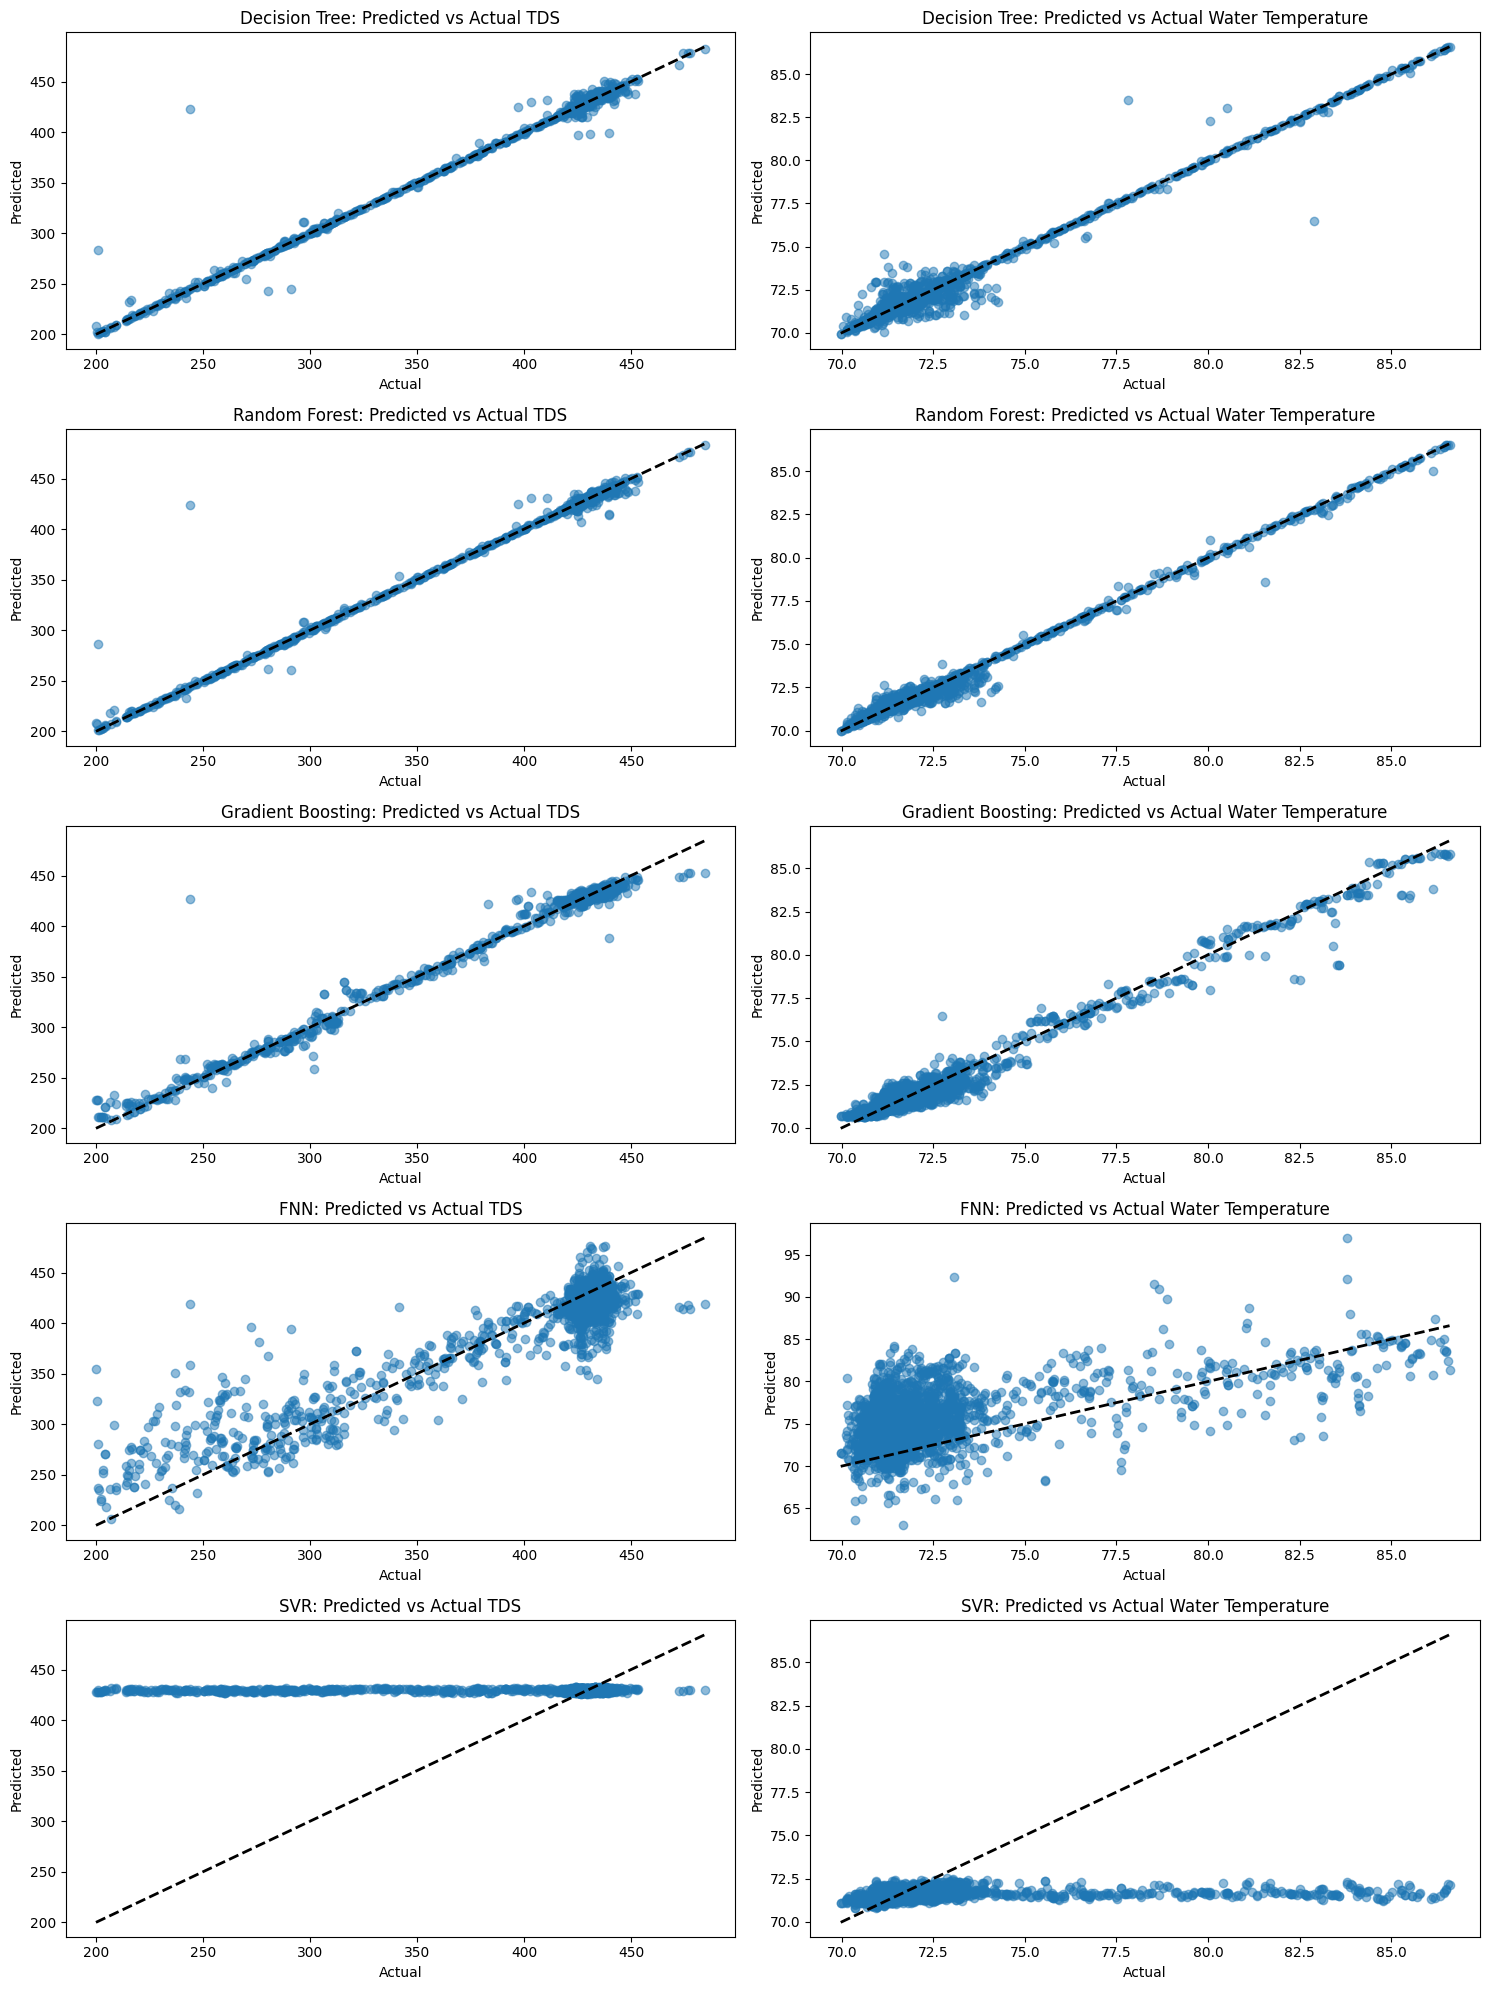

In [194]:
import matplotlib.pyplot as plt

# Make sure you have predictions for each model
# Example: y_pred_dt, y_pred_rf, y_pred_fnn, y_pred_gb, y_pred_svr

plt.figure(figsize=(15, 20))  # Adjust the figure size as needed

# Decision Tree
plt.subplot(5, 2, 1)
plt.scatter(y_test['TDS'], y_pred_dt[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Decision Tree: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(5, 2, 2)
plt.scatter(y_test['Water Temperature'], y_pred_dt[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Decision Tree: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest
plt.subplot(5, 2, 3)
plt.scatter(y_test['TDS'], y_pred_rf[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Random Forest: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(5, 2, 4)
plt.scatter(y_test['Water Temperature'], y_pred_rf[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Random Forest: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')


# Feedforward Neural Network (FNN)
plt.subplot(5, 2, 7)
plt.scatter(y_test['TDS'], y_pred_fnn[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('FNN: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(5, 2, 8)
plt.scatter(y_test['Water Temperature'], y_pred_fnn[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('FNN: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')


# Gradient Boosting
plt.subplot(5, 2, 5)
plt.scatter(y_test['TDS'], y_pred_gb_tds, alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Gradient Boosting: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(5, 2, 6)
plt.scatter(y_test['Water Temperature'], y_pred_gb_temp, alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Gradient Boosting: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Support Vector Regression (SVR) for TDS
plt.subplot(5, 2, 9)
plt.scatter(y_test['TDS'], y_pred_svr_tds, alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('SVR: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Support Vector Regression (SVR) for Water Temperature
plt.subplot(5, 2, 10)
plt.scatter(y_test['Water Temperature'], y_pred_svr_water_temp, alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('SVR: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


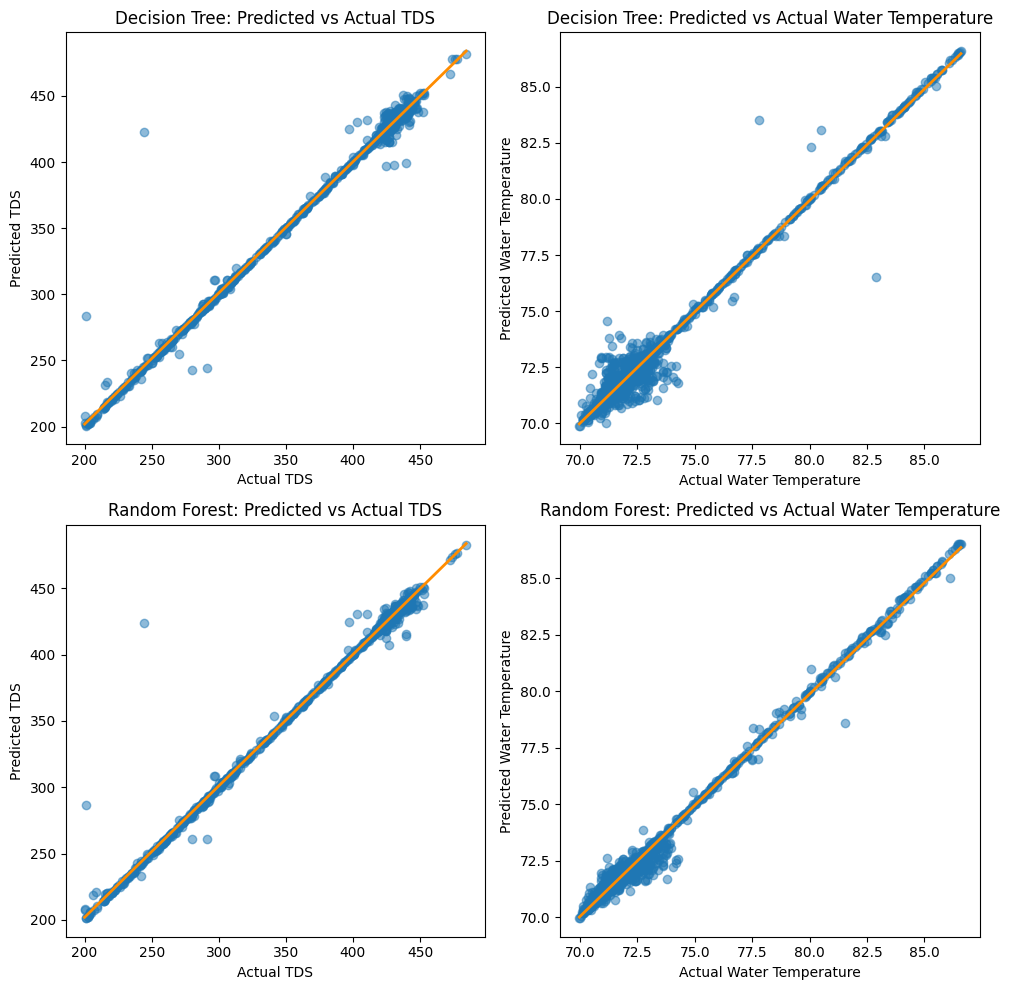

Decision Tree - TDS - MSE: 19.968984614076554, RMSE: 4.468666984020688, MAE: 0.8330772972839116, R^2: 0.9921878101051312
Decision Tree - Water Temperature - MSE: 0.12506715804035484, RMSE: 0.35364835365141295, MAE: 0.1264939280817336, R^2: 0.9823888909344011
Random Forest - TDS - MSE: 17.579862392292462, RMSE: 4.192834648813672, MAE: 0.724783778359866, R^2: 0.9931224733761655
Random Forest - Water Temperature - MSE: 0.049454153042294315, RMSE: 0.22238289736914194, MAE: 0.10454501950740386, R^2: 0.9930362015366685


In [195]:
#Random Forest vs Decision Tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming y_test['TDS'] and y_test['Water Temperature'] are the actual values
# Assuming y_pred_dt and y_pred_rf are the predicted values from Decision Tree and Random Forest respectively

# Calculate metrics for Decision Tree
mse_dt_tds = mean_squared_error(y_test['TDS'], y_pred_dt[:, 0])
rmse_dt_tds = mean_squared_error(y_test['TDS'], y_pred_dt[:, 0], squared=False)
mae_dt_tds = mean_absolute_error(y_test['TDS'], y_pred_dt[:, 0])
r2_dt_tds = r2_score(y_test['TDS'], y_pred_dt[:, 0])

mse_dt_temp = mean_squared_error(y_test['Water Temperature'], y_pred_dt[:, 1])
rmse_dt_temp = mean_squared_error(y_test['Water Temperature'], y_pred_dt[:, 1], squared=False)
mae_dt_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_dt[:, 1])
r2_dt_temp = r2_score(y_test['Water Temperature'], y_pred_dt[:, 1])

# Calculate metrics for Random Forest
mse_rf_tds = mean_squared_error(y_test['TDS'], y_pred_rf[:, 0])
rmse_rf_tds = mean_squared_error(y_test['TDS'], y_pred_rf[:, 0], squared=False)
mae_rf_tds = mean_absolute_error(y_test['TDS'], y_pred_rf[:, 0])
r2_rf_tds = r2_score(y_test['TDS'], y_pred_rf[:, 0])

mse_rf_temp = mean_squared_error(y_test['Water Temperature'], y_pred_rf[:, 1])
rmse_rf_temp = mean_squared_error(y_test['Water Temperature'], y_pred_rf[:, 1], squared=False)
mae_rf_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_rf[:, 1])
r2_rf_temp = r2_score(y_test['Water Temperature'], y_pred_rf[:, 1])

# Plotting the predicted vs actual values for Decision Tree and Random Forest
plt.figure(figsize=(10, 10))  # Adjust the figure size as needed

# Decision Tree
plt.subplot(2, 2, 1)
plt.scatter(y_test['TDS'], y_pred_dt[:, 0], alpha=0.5)
plt.plot(np.unique(y_test['TDS']), np.poly1d(np.polyfit(y_test['TDS'], y_pred_dt[:, 0], 1))(np.unique(y_test['TDS'])), color='darkorange', lw=2)
plt.title('Decision Tree: Predicted vs Actual TDS')
plt.xlabel('Actual TDS')
plt.ylabel('Predicted TDS')

plt.subplot(2, 2, 2)
plt.scatter(y_test['Water Temperature'], y_pred_dt[:, 1], alpha=0.5)
plt.plot(np.unique(y_test['Water Temperature']), np.poly1d(np.polyfit(y_test['Water Temperature'], y_pred_dt[:, 1], 1))(np.unique(y_test['Water Temperature'])), color='darkorange', lw=2)
plt.title('Decision Tree: Predicted vs Actual Water Temperature')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')

# Random Forest
plt.subplot(2, 2, 3)
plt.scatter(y_test['TDS'], y_pred_rf[:, 0], alpha=0.5)
plt.plot(np.unique(y_test['TDS']), np.poly1d(np.polyfit(y_test['TDS'], y_pred_rf[:, 0], 1))(np.unique(y_test['TDS'])), color='darkorange', lw=2)
plt.title('Random Forest: Predicted vs Actual TDS')
plt.xlabel('Actual TDS')
plt.ylabel('Predicted TDS')

plt.subplot(2, 2, 4)
plt.scatter(y_test['Water Temperature'], y_pred_rf[:, 1], alpha=0.5)
plt.plot(np.unique(y_test['Water Temperature']), np.poly1d(np.polyfit(y_test['Water Temperature'], y_pred_rf[:, 1], 1))(np.unique(y_test['Water Temperature'])), color='darkorange', lw=2)
plt.title('Random Forest: Predicted vs Actual Water Temperature')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')

plt.tight_layout()
plt.show()

# Print metrics for Decision Tree
print(f"Decision Tree - TDS - MSE: {mse_dt_tds}, RMSE: {rmse_dt_tds}, MAE: {mae_dt_tds}, R^2: {r2_dt_tds}")
print(f"Decision Tree - Water Temperature - MSE: {mse_dt_temp}, RMSE: {rmse_dt_temp}, MAE: {mae_dt_temp}, R^2: {r2_dt_temp}")

# Print metrics for Random Forest
print(f"Random Forest - TDS - MSE: {mse_rf_tds}, RMSE: {rmse_rf_tds}, MAE: {mae_rf_tds}, R^2: {r2_rf_tds}")
print(f"Random Forest - Water Temperature - MSE: {mse_rf_temp}, RMSE: {rmse_rf_temp}, MAE: {mae_rf_temp}, R^2: {r2_rf_temp}")


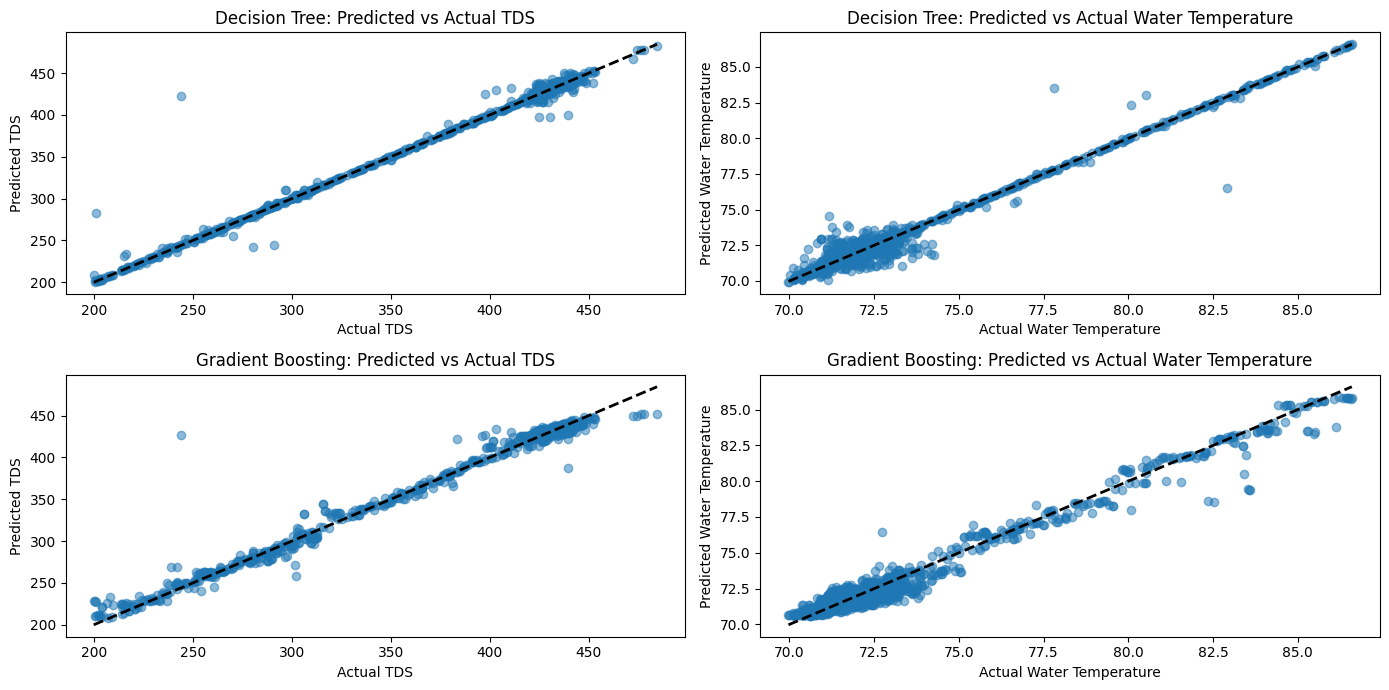

Decision Tree - TDS - MSE: 19.968984614076554, RMSE: 4.468666984020688, MAE: 0.8330772972839116, R^2: 0.9921878101051312
Decision Tree - Water Temperature - MSE: 0.12506715804035484, RMSE: 0.35364835365141295, MAE: 0.1264939280817336, R^2: 0.9823888909344011
Gradient Boosting - TDS - MSE: 29.56825581153595, RMSE: 5.437670071964273, MAE: 2.3956398346595846, R^2: 0.9884324198889439
Gradient Boosting - Water Temperature - MSE: 0.19885159113317247, RMSE: 0.44592778690408214, MAE: 0.29590754150121884, R^2: 0.9719990674275638


In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Make sure you have predictions for each model
# Example: y_pred_dt_tds, y_pred_dt_temp for Decision Tree
# Example: y_pred_gb_tds, y_pred_gb_temp for Gradient Boosting

# Corrected indexing for predictions
mse_dt_tds = mean_squared_error(y_test['TDS'], y_pred_dt[:, 0])
mse_dt_temp = mean_squared_error(y_test['Water Temperature'], y_pred_dt[:, 1])
rmse_dt_tds = np.sqrt(mse_dt_tds)
rmse_dt_temp = np.sqrt(mse_dt_temp)
mae_dt_tds = mean_absolute_error(y_test['TDS'], y_pred_dt[:, 0])
mae_dt_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_dt[:, 1])
r2_dt_tds = r2_score(y_test['TDS'], y_pred_dt[:, 0])
r2_dt_temp = r2_score(y_test['Water Temperature'], y_pred_dt[:, 1])

# Calculate metrics for Gradient Boosting
mse_gb_tds = mean_squared_error(y_test['TDS'], y_pred_gb_tds)
mse_gb_temp = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp)
rmse_gb_tds = np.sqrt(mse_gb_tds)
rmse_gb_temp = np.sqrt(mse_gb_temp)
mae_gb_tds = mean_absolute_error(y_test['TDS'], y_pred_gb_tds)
mae_gb_temp = mean_absolute_error(y_test['Water Temperature'], y_pred_gb_temp)
r2_gb_tds = r2_score(y_test['TDS'], y_pred_gb_tds)
r2_gb_temp = r2_score(y_test['Water Temperature'], y_pred_gb_temp)

# Plotting the predicted vs actual values for Decision Tree
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
plt.scatter(y_test['TDS'], y_pred_dt[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Decision Tree: Predicted vs Actual TDS')
plt.xlabel('Actual TDS')
plt.ylabel('Predicted TDS')

plt.subplot(2, 2, 2)
plt.scatter(y_test['Water Temperature'], y_pred_dt[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Decision Tree: Predicted vs Actual Water Temperature')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')

# Plotting the predicted vs actual values for Gradient Boosting
plt.subplot(2, 2, 3)
plt.scatter(y_test['TDS'], y_pred_gb_tds, alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Gradient Boosting: Predicted vs Actual TDS')
plt.xlabel('Actual TDS')
plt.ylabel('Predicted TDS')

plt.subplot(2, 2, 4)
plt.scatter(y_test['Water Temperature'], y_pred_gb_temp, alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Gradient Boosting: Predicted vs Actual Water Temperature')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')

plt.tight_layout()
plt.show()

# Print metrics for Decision Tree
print(f"Decision Tree - TDS - MSE: {mse_dt_tds}, RMSE: {rmse_dt_tds}, MAE: {mae_dt_tds}, R^2: {r2_dt_tds}")
print(f"Decision Tree - Water Temperature - MSE: {mse_dt_temp}, RMSE: {rmse_dt_temp}, MAE: {mae_dt_temp}, R^2: {r2_dt_temp}")

#Print metrics for Gradient Boosting
print(f"Gradient Boosting - TDS - MSE: {mse_gb_tds}, RMSE: {rmse_gb_tds}, MAE: {mae_gb_tds}, R^2: {r2_gb_tds}")
print(f"Gradient Boosting - Water Temperature - MSE: {mse_gb_temp}, RMSE: {rmse_gb_temp}, MAE: {mae_gb_temp}, R^2: {r2_gb_temp}")


### Issues.
1. The dataset is imbalance
2. It's taking too long because of how many features
3. There is noise in the dataset

We are dropping FNN and SVR because they didn't perform anywhere close to the other models.
The next thing we are doing is MinMax Scaling and we are doing feature selection. One of the feature selection will be the correlations we have from the heatmaps. The other, we think, should be related to the tradional formual for TDS : TDS = k * EC.

We think that the correlations for the dataset may be incorrect to what acutually affects TDS. We were told that the things that affect TDS is Electric Conductivity (which we don't have) and water input (this is percipation, rain, discharge from aquifier, etc); That feature selection is manual

### Data Processing
1. MinMax Scaling
2. Normalization

In [147]:
final_df = final_df_copy
final_df = final_df.sample(frac=0.01)

In [148]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, normalize

# Assuming final_df is your DataFrame

# Initialize the LabelEncoder
le = LabelEncoder()

# Separate numeric and non-numeric columns
numeric_columns = final_df.select_dtypes(include=['number'])
non_numeric_columns = final_df.select_dtypes(exclude=['number'])

# Apply LabelEncoder to each non-numeric column and store in a new DataFrame
encoded_columns = non_numeric_columns.apply(lambda col: le.fit_transform(col.astype(str)))

# Concatenate the numeric columns and encoded columns
final_df_processed = pd.concat([numeric_columns, encoded_columns], axis=1)

# Apply MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_df_processed)

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=final_df_processed.columns)
# Step 2: Apply Normalization
# Normalize the scaled data
normalized_df = normalize(scaled_df, axis=0)

# Convert normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_df, columns=final_df.columns)

# Now 'normalized_df' is your MinMax scaled and normalized DataFrame

In [149]:
final_df = normalized_df

The next part is feature selection. There will be two features, one from the correlation charts, the other from manual feature selection.

In [150]:
# Convert to Series if watertemp_corr and tds_corr are DataFrames
if isinstance(watertemp_corr, pd.DataFrame):
    watertemp_corr_series = watertemp_corr.iloc[0]
else:
    watertemp_corr_series = watertemp_corr

if isinstance(tds_corr, pd.DataFrame):
    tds_corr_series = tds_corr.iloc[0]
else:
    tds_corr_series = tds_corr

# Drop 'TDS' and 'Water Temperature' from the correlation Series
watertemp_corr_series = watertemp_corr_series.drop(labels=['TDS', 'Water Temperature'], errors='ignore')
tds_corr_series = tds_corr_series.drop(labels=['TDS', 'Water Temperature'], errors='ignore')

# Now sort and get the top 10 features excluding 'TDS' and 'Water Temperature'
top10_watertemp_features = watertemp_corr_series.abs().sort_values(ascending=False).head(10)
print("Top 10 Features for Water Temperature Correlation:")
print(top10_watertemp_features)

top10_tds_features = tds_corr_series.abs().sort_values(ascending=False).head(10)
print("\nTop 10 Features for TDS Correlation:")
print(top10_tds_features)


Top 10 Features for Water Temperature Correlation:
air_temp_high_24_hour_set_1     0.626019
air_temp_low_24_hour_set_1      0.546546
heat_index_set_1d               0.477690
air_temp_set_1                  0.453784
air_temp_high_6_hour_set_1      0.452192
air_temp_low_6_hour_set_1       0.437688
Lat                             0.430631
dew_point_temperature_set_1     0.388165
dew_point_temperature_set_1d    0.387834
Long                            0.360187
Name: Water Temperature, dtype: float64

Top 10 Features for TDS Correlation:
air_temp_high_24_hour_set_1     0.626988
air_temp_low_24_hour_set_1      0.529152
heat_index_set_1d               0.453357
air_temp_high_6_hour_set_1      0.423910
air_temp_low_6_hour_set_1       0.411173
Discharge Rate                  0.395819
air_temp_set_1                  0.387950
precip_accum_six_hour_set_1     0.361061
precip_accum_24_hour_set_1      0.342963
dew_point_temperature_set_1d    0.312342
Name: TDS, dtype: float64


In [151]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming final_df is your DataFrame
# Assuming top10_watertemp_features and top10_tds_features are your Series with top features

# Combine top 10 features from both watertemp_corr and tds_corr, removing duplicates
top10_features = list(set(top10_watertemp_features.index.tolist() + top10_tds_features.index.tolist()))

# Select only the top 10 features from your DataFrame
X = final_df[top10_features]

# If any of the top 10 features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Training the model
dt_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt_top10 = dt_regressor.predict(X_test)

# Computing the performance metrics
mse_dt_tds_top10 = mean_squared_error(y_test['TDS'], y_pred_dt_top10[:, 0])
mse_dt_temp_top10 = mean_squared_error(y_test['Water Temperature'], y_pred_dt_top10[:, 1])
r2_dt_tds_top10 = r2_score(y_test['TDS'], y_pred_dt_top10[:, 0])
r2_dt_temp_top10 = r2_score(y_test['Water Temperature'], y_pred_dt_top10[:, 1])
mae_dt_tds_top10 = mean_absolute_error(y_test['TDS'], y_pred_dt_top10[:, 0])
mae_dt_temp_top10 = mean_absolute_error(y_test['Water Temperature'], y_pred_dt_top10[:, 1])
rmse_dt_tds_top10 = mean_squared_error(y_test['TDS'], y_pred_dt_top10[:, 0], squared=False)
rmse_dt_temp_top10 = mean_squared_error(y_test['Water Temperature'], y_pred_dt_top10[:, 1], squared=False)

# Print the performance metrics
print(f"Decision Tree - Mean Squared Error for TDS: {mse_dt_tds_top10}")
print(f"Decision Tree - Mean Squared Error for Water Temperature: {mse_dt_temp_top10}")
print(f"Decision Tree - R^2 Score for TDS: {r2_dt_tds_top10}")
print(f"Decision Tree - R^2 Score for Water Temperature: {r2_dt_temp_top10}")
print(f"Decision Tree - Mean Absolute Error for TDS: {mae_dt_tds_top10}")
print(f"Decision Tree - Mean Absolute Error for Water Temperature: {mae_dt_temp_top10}")
print(f"Decision Tree - Root Mean Squared Error for TDS: {rmse_dt_tds_top10}")
print(f"Decision Tree - Root Mean Squared Error for Water Temperature: {rmse_dt_temp_top10}")


Decision Tree - Mean Squared Error for TDS: 6.686597641170892e-06
Decision Tree - Mean Squared Error for Water Temperature: 8.021389439462942e-07
Decision Tree - R^2 Score for TDS: 0.49900676078248574
Decision Tree - R^2 Score for Water Temperature: 0.9337139202191173
Decision Tree - Mean Absolute Error for TDS: 0.0008889182073648457
Decision Tree - Mean Absolute Error for Water Temperature: 0.00012640746520509494
Decision Tree - Root Mean Squared Error for TDS: 0.002585845633670133
Decision Tree - Root Mean Squared Error for Water Temperature: 0.0008956220988487802


In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Assuming final_df is your DataFrame
# Assuming top10_watertemp_features and top10_tds_features are your Series with top features

# Combine top 10 features from both watertemp_corr and tds_corr, removing duplicates
top10_features = list(set(top10_watertemp_features.index.tolist() + top10_tds_features.index.tolist()))

# Select only the top 10 features from your DataFrame
X = final_df[top10_features]

# If any of the top 10 features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Training the model
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf_top10 = regressor.predict(X_test)

# Computing the performance metrics
mse_rf_tds_top10 = mean_squared_error(y_test['TDS'], y_pred_rf_top10[:, 0])
mse_rf_temp_top10 = mean_squared_error(y_test['Water Temperature'], y_pred_rf_top10[:, 1])
r2_rf_tds_top10 = r2_score(y_test['TDS'], y_pred_rf_top10[:, 0])
r2_rf_temp_top10 = r2_score(y_test['Water Temperature'], y_pred_rf_top10[:, 1])
mae_rf_tds_top10 = mean_absolute_error(y_test['TDS'], y_pred_rf_top10[:, 0])
mae_rf_temp_top10 = mean_absolute_error(y_test['Water Temperature'], y_pred_rf_top10[:, 1])
rmse_rf_tds_top10 = mean_squared_error(y_test['TDS'], y_pred_rf_top10[:, 0], squared=False)
rmse_rf_temp_top10 = mean_squared_error(y_test['Water Temperature'], y_pred_rf_top10[:, 1], squared=False)

# Print the performance metrics
print(f"Random Forest - Mean Squared Error for TDS: {mse_rf_tds_top10}")
print(f"Random Forest - Mean Squared Error for Water Temperature: {mse_rf_temp_top10}")
print(f"Random Forest - R^2 Score for TDS: {r2_rf_tds_top10}")
print(f"Random Forest - R^2 Score for Water Temperature: {r2_rf_temp_top10}")
print(f"Random Forest - Mean Absolute Error for TDS: {mae_rf_tds_top10}")
print(f"Random Forest - Mean Absolute Error for Water Temperature: {mae_rf_temp_top10}")
print(f"Random Forest - Root Mean Squared Error for TDS: {rmse_rf_tds_top10}")
print(f"Random Forest - Root Mean Squared Error for Water Temperature: {rmse_rf_temp_top10}")


Random Forest - Mean Squared Error for TDS: 3.9379824028956735e-06
Random Forest - Mean Squared Error for Water Temperature: 4.4833073287788665e-07
Random Forest - R^2 Score for TDS: 0.7049467209062099
Random Forest - R^2 Score for Water Temperature: 0.9629514475614901
Random Forest - Mean Absolute Error for TDS: 0.0008884872462662857
Random Forest - Mean Absolute Error for Water Temperature: 0.0001856421495360039
Random Forest - Root Mean Squared Error for TDS: 0.001984435033679781
Random Forest - Root Mean Squared Error for Water Temperature: 0.0006695750390194415


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# Assuming final_df is your DataFrame
# Assuming top10_watertemp_features and top10_tds_features are your Series with top features

# Combine top 10 features from both watertemp_corr and tds_corr, removing duplicates
top10_features = list(set(top10_watertemp_features.index.tolist() + top10_tds_features.index.tolist()))

# Select only the top 10 features from your DataFrame
X = final_df[top10_features]

# If any of the top 10 features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting for 'TDS' prediction
gb_model_tds = GradientBoostingRegressor()
y_train_tds = y_train['TDS']  # Select 'TDS' as the target variable
gb_model_tds.fit(X_train, y_train_tds)
y_pred_gb_tds_top10 = gb_model_tds.predict(X_test)

# Gradient Boosting for 'Water Temperature' prediction
gb_model_temp = GradientBoostingRegressor()
y_train_temp= y_train['Water Temperature']  # Select 'Water Temperature' as the target variable
gb_model_temp.fit(X_train, y_train_temp)
y_pred_gb_temp_top10 = gb_model_temp.predict(X_test)

# Computing the performance metrics
mse_gb_tds_top10 = mean_squared_error(y_test['TDS'], y_pred_gb_tds_top10)
mse_gb_temp_top10 = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp_top10)
r2_gb_tds_top10 = r2_score(y_test['TDS'], y_pred_gb_tds_top10)
r2_gb_temp_top10 = r2_score(y_test['Water Temperature'], y_pred_gb_temp_top10)
mae_gb_tds_top10 = mean_absolute_error(y_test['TDS'], y_pred_gb_tds_top10)
mae_gb_temp_top10 = mean_absolute_error(y_test['Water Temperature'], y_pred_gb_temp_top10)
rmse_gb_tds_top10 = mean_squared_error(y_test['TDS'], y_pred_gb_tds_top10, squared=False)
rmse_gb_temp_top10 = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp_top10, squared=False)

# Print the performance metrics
print(f"Gradient Boosting - Mean Squared Error for TDS: {mse_gb_tds_top10}")
print(f"Gradient Boosting - Mean Squared Error for Water Temperature: {mse_gb_temp_top10}")
print(f"Gradient Boosting - R^2 Score for TDS: {r2_gb_tds_top10}")
print(f"Gradient Boosting - R^2 Score for Water Temperature: {r2_gb_temp_top10}")
print(f"Gradient Boosting - Mean Absolute Error for TDS: {mae_gb_tds_top10}")
print(f"Gradient Boosting - Mean Absolute Error for Water Temperature: {mae_gb_temp_top10}")
print(f"Gradient Boosting - Root Mean Squared Error for TDS: {rmse_gb_tds_top10}")
print(f"Gradient Boosting - Root Mean Squared Error for Water Temperature: {rmse_gb_temp_top10}")


Gradient Boosting - Mean Squared Error for TDS: 5.653957955998923e-06
Gradient Boosting - Mean Squared Error for Water Temperature: 2.809925383246518e-06
Gradient Boosting - R^2 Score for TDS: 0.5763772754420557
Gradient Boosting - R^2 Score for Water Temperature: 0.7677971633993166
Gradient Boosting - Mean Absolute Error for TDS: 0.0017475809659553596
Gradient Boosting - Mean Absolute Error for Water Temperature: 0.0011460677916489625
Gradient Boosting - Root Mean Squared Error for TDS: 0.002377805281346419
Gradient Boosting - Root Mean Squared Error for Water Temperature: 0.001676283204964638


### We are now going to only select features related to percipitation, discharge rate, and wind. We are selecting wind because usually, if the weather station has higher wind or cloud cover, this relates to it raining.

In [154]:
weather_related_features = [
    'precip_accum_24_hour_set_1',
    'precip_accum_since_local_midnight_set_1',
    'precip_accum_one_hour_set_1',
    'precip_accum_three_hour_set_1',
    'precip_accum_six_hour_set_1',
    'Discharge Rate',
    'cloud_layer_3_code_set_1',
    'cloud_layer_1_code_set_1',
    'cloud_layer_2_code_set_1',
    'wind_speed_set_1',
    'wind_direction_set_1',
    'wind_gust_set_1',
    'wind_chill_set_1d',
    'wind_cardinal_direction_set_1d',
    'peak_wind_speed_set_1',
    'peak_wind_direction_set_1'
]

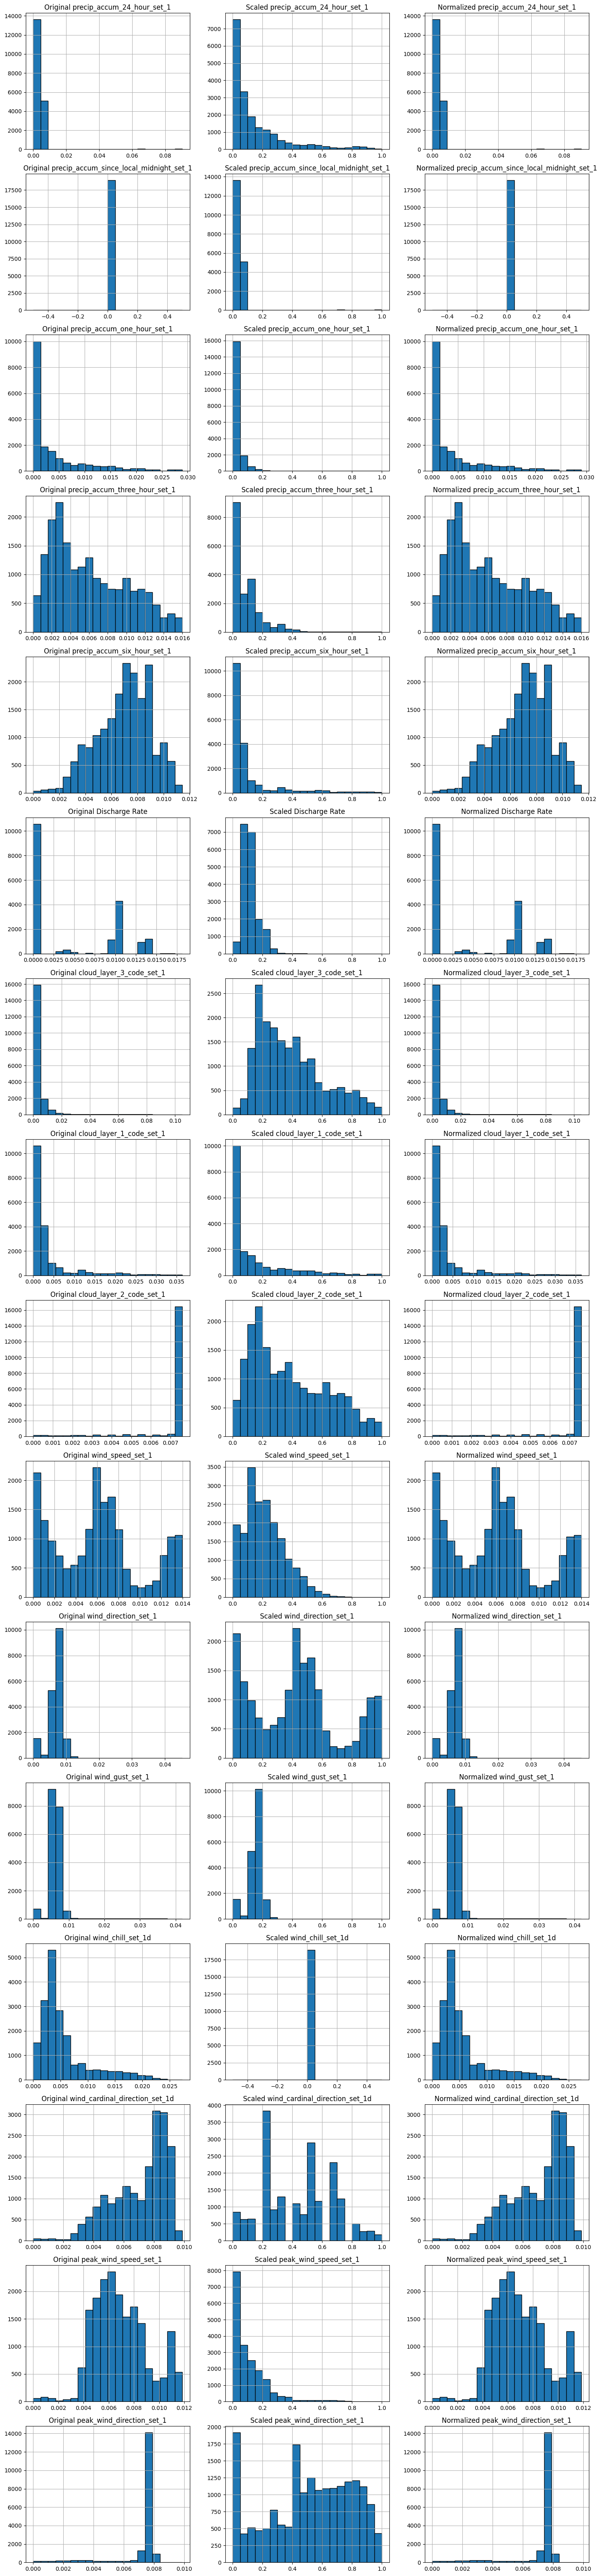

In [155]:
import matplotlib.pyplot as plt

# Assuming weather_related_features is your list of features related to weather
num_cols = len(weather_related_features)

# Set up the matplotlib figure (adjust figsize as needed)
plt.figure(figsize=(15, 4 * num_cols))

# Iterate over each weather-related feature to create histograms
for i, column in enumerate(weather_related_features):
    if column in final_df.columns:
        # Original data histogram
        plt.subplot(num_cols, 3, 3*i + 1)
        final_df[column].hist(bins=20, edgecolor='black')
        plt.title(f'Original {column}')
        
        # Scaled data histogram
        plt.subplot(num_cols, 3, 3*i + 2)
        scaled_df[column].hist(bins=20, edgecolor='black')
        plt.title(f'Scaled {column}')

        # Normalized data histogram
        plt.subplot(num_cols, 3, 3*i + 3)
        normalized_df[column].hist(bins=20, edgecolor='black')
        plt.title(f'Normalized {column}')

plt.tight_layout()
plt.show()


In [156]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming final_df is your DataFrame
# Assuming weather_related_features is your list of features related to weather

# Select only the weather-related features from your DataFrame
X = final_df[weather_related_features]

# If any of the weather-related features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Training the model
dt_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt_precip = dt_regressor.predict(X_test)

# Computing the performance metrics
mse_dt_tds_precip = mean_squared_error(y_test['TDS'], y_pred_dt_precip[:, 0])
mse_dt_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_dt_precip[:, 1])
r2_dt_tds_precip = r2_score(y_test['TDS'], y_pred_dt_precip[:, 0])
r2_dt_temp_precip = r2_score(y_test['Water Temperature'], y_pred_dt_precip[:, 1])
mae_dt_tds_precip = mean_absolute_error(y_test['TDS'], y_pred_dt_precip[:, 0])
mae_dt_temp_precip = mean_absolute_error(y_test['Water Temperature'], y_pred_dt_precip[:, 1])
rmse_dt_tds_precip = mean_squared_error(y_test['TDS'], y_pred_dt_precip[:, 0], squared=False)
rmse_dt_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_dt_precip[:, 1], squared=False)

# Print the performance metrics
print(f"Decision Tree - Mean Squared Error for TDS: {mse_dt_tds_precip}")
print(f"Decision Tree - Mean Squared Error for Water Temperature: {mse_dt_temp_precip}")
print(f"Decision Tree - R^2 Score for TDS: {r2_dt_tds_precip}")
print(f"Decision Tree - R^2 Score for Water Temperature: {r2_dt_temp_precip}")
print(f"Decision Tree - Mean Absolute Error for TDS: {mae_dt_tds_precip}")
print(f"Decision Tree - Mean Absolute Error for Water Temperature: {mae_dt_temp_precip}")
print(f"Decision Tree - Root Mean Squared Error for TDS: {rmse_dt_tds_precip}")
print(f"Decision Tree - Root Mean Squared Error for Water Temperature: {rmse_dt_temp_precip}")


Decision Tree - Mean Squared Error for TDS: 5.704742085629505e-06
Decision Tree - Mean Squared Error for Water Temperature: 8.611393465594715e-07
Decision Tree - R^2 Score for TDS: 0.5725722752057902
Decision Tree - R^2 Score for Water Temperature: 0.9288383242587956
Decision Tree - Mean Absolute Error for TDS: 0.0007429992693189142
Decision Tree - Mean Absolute Error for Water Temperature: 0.0001268458725988698
Decision Tree - Root Mean Squared Error for TDS: 0.002388460191342846
Decision Tree - Root Mean Squared Error for Water Temperature: 0.0009279759407223182


In [157]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Assuming final_df is your DataFrame
# Assuming weather_related_features is your list of features related to weather

# Select only the weather-related features from your DataFrame
X = final_df[weather_related_features]

# If any of the weather-related features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Training the model
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf_precip = regressor.predict(X_test)

# Computing the performance metrics
mse_rf_tds_precip = mean_squared_error(y_test['TDS'], y_pred_rf_precip[:, 0])
mse_rf_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_rf_precip[:, 1])
r2_rf_tds_precip = r2_score(y_test['TDS'], y_pred_rf_precip[:, 0])
r2_rf_temp_precip = r2_score(y_test['Water Temperature'], y_pred_rf_precip[:, 1])
mae_rf_tds_precip = mean_absolute_error(y_test['TDS'], y_pred_rf_precip[:, 0])
mae_rf_temp_precip = mean_absolute_error(y_test['Water Temperature'], y_pred_rf_precip[:, 1])
rmse_rf_tds_precip = mean_squared_error(y_test['TDS'], y_pred_rf_precip[:, 0], squared=False)
rmse_rf_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_rf_precip[:, 1], squared=False)

# Print the performance metrics
print(f"Random Forest - Mean Squared Error for TDS: {mse_rf_tds}")
print(f"Random Forest - Mean Squared Error for Water Temperature: {mse_rf_temp}")
print(f"Random Forest - R^2 Score for TDS: {r2_rf_tds}")
print(f"Random Forest - R^2 Score for Water Temperature: {r2_rf_temp}")
print(f"Random Forest - Mean Absolute Error for TDS: {mae_rf_tds}")
print(f"Random Forest - Mean Absolute Error for Water Temperature: {mae_rf_temp}")
print(f"Random Forest - Root Mean Squared Error for TDS: {rmse_rf_tds}")
print(f"Random Forest - Root Mean Squared Error for Water Temperature: {rmse_rf_temp}")


Random Forest - Mean Squared Error for TDS: 5.78755519885632
Random Forest - Mean Squared Error for Water Temperature: 0.055755855978433716
Random Forest - R^2 Score for TDS: 0.9974540275146998
Random Forest - R^2 Score for Water Temperature: 0.9913528607141086
Random Forest - Mean Absolute Error for TDS: 0.7438090516538636
Random Forest - Mean Absolute Error for Water Temperature: 0.10924985450789987
Random Forest - Root Mean Squared Error for TDS: 2.4057338171244798
Random Forest - Root Mean Squared Error for Water Temperature: 0.23612677946059765


In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# Assuming final_df is your DataFrame
# Assuming weather_related_features is your list of features related to weather

# Select only the weather-related features from your DataFrame
X = final_df[weather_related_features]

# If any of the weather-related features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting for 'TDS' prediction
gb_model_tds = GradientBoostingRegressor()
y_train_tds = y_train['TDS']  # Select 'TDS' as the target variable
gb_model_tds.fit(X_train, y_train_tds)
y_pred_gb_tds_precip = gb_model_tds.predict(X_test)

# Gradient Boosting for 'Water Temperature' prediction
gb_model_temp = GradientBoostingRegressor()
y_train_temp = y_train['Water Temperature']  # Select 'Water Temperature' as the target variable
gb_model_temp.fit(X_train, y_train_temp)
y_pred_gb_temp_precip = gb_model_temp.predict(X_test)

# Computing the performance metrics
mse_gb_tds_precip = mean_squared_error(y_test['TDS'], y_pred_gb_tds_precip)
mse_gb_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp_precip)
r2_gb_tds_precip = r2_score(y_test['TDS'], y_pred_gb_tds_precip)
r2_gb_temp_precip = r2_score(y_test['Water Temperature'], y_pred_gb_temp_precip)
mae_gb_tds_precip = mean_absolute_error(y_test['TDS'], y_pred_gb_tds_precip)
mae_gb_temp_precip = mean_absolute_error(y_test['Water Temperature'], y_pred_gb_temp_precip)
rmse_gb_tds_precip = mean_squared_error(y_test['TDS'], y_pred_gb_tds_precip, squared=False)
rmse_gb_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp_precip, squared=False)

# Print the performance metrics
print(f"Gradient Boosting - Mean Squared Error for TDS: {mse_gb_tds_precip}")
print(f"Gradient Boosting - Mean Squared Error for Water Temperature: {mse_gb_temp_precip}")
print(f"Gradient Boosting - R^2 Score for TDS: {r2_gb_tds_precip}")
print(f"Gradient Boosting - R^2 Score for Water Temperature: {r2_gb_temp_precip}")
print(f"Gradient Boosting - Mean Absolute Error for TDS: {mae_gb_tds_precip}")
print(f"Gradient Boosting - Mean Absolute Error for Water Temperature: {mae_gb_temp_precip}")
print(f"Gradient Boosting - Root Mean Squared Error for TDS: {rmse_gb_tds_precip}")
print(f"Gradient Boosting - Root Mean Squared Error for Water Temperature: {rmse_gb_temp_precip}")


Gradient Boosting - Mean Squared Error for TDS: 4.932646484286268e-06
Gradient Boosting - Mean Squared Error for Water Temperature: 3.845650314675522e-06
Gradient Boosting - R^2 Score for TDS: 0.630421527854228
Gradient Boosting - R^2 Score for Water Temperature: 0.6822083187809598
Gradient Boosting - Mean Absolute Error for TDS: 0.0015709178665335403
Gradient Boosting - Mean Absolute Error for Water Temperature: 0.0015660241593252577
Gradient Boosting - Root Mean Squared Error for TDS: 0.0022209562094481438
Gradient Boosting - Root Mean Squared Error for Water Temperature: 0.001961032971338198


### Here are the performance graphs to compare the models that chose the top10 features and the ones that used precip features

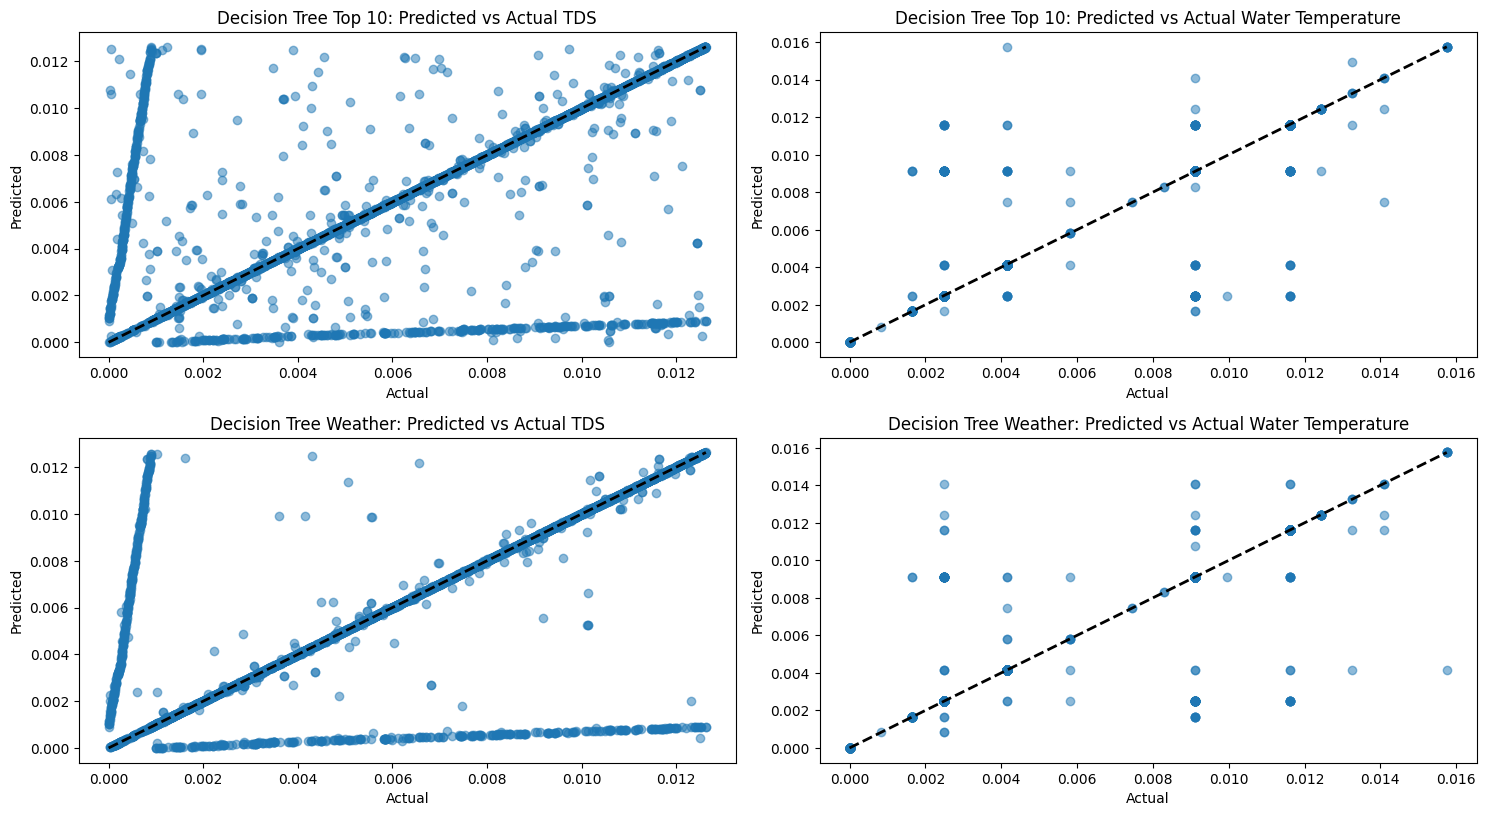

In [159]:
import matplotlib.pyplot as plt

# Assuming you have predictions as y_pred_dt_top10, y_pred_dt_weather, etc.

plt.figure(figsize=(15, 20))  # Adjust the figure size as needed

# Decision Tree using Top 10 Features
plt.subplot(5, 2, 1)
plt.scatter(y_test['TDS'], y_pred_dt_top10[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Decision Tree Top 10: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(5, 2, 2)
plt.scatter(y_test['Water Temperature'], y_pred_dt_top10[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Decision Tree Top 10: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Decision Tree using Weather-Related Features
plt.subplot(5, 2, 3)
plt.scatter(y_test['TDS'], y_pred_dt_precip[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Decision Tree Weather: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(5, 2, 4)
plt.scatter(y_test['Water Temperature'], y_pred_dt_precip[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Decision Tree Weather: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Add similar subplots for Random Forest, Gradient Boosting, etc., using both feature sets

plt.tight_layout()
plt.show()

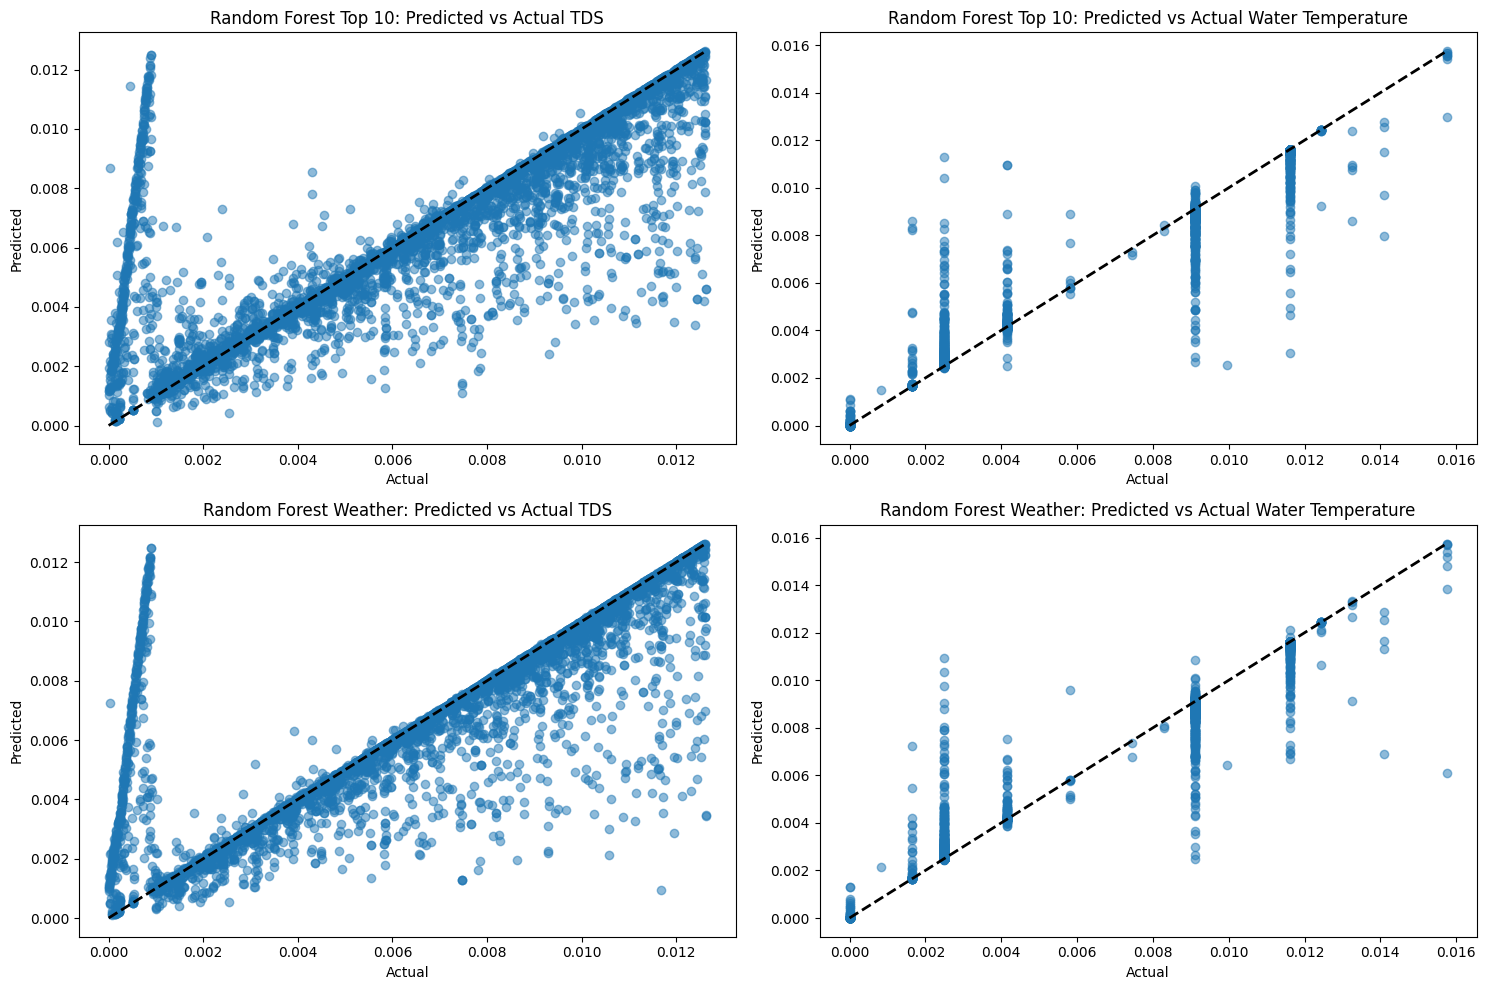

In [160]:
import matplotlib.pyplot as plt

# Assuming you have predictions as y_pred_rf_top10, y_pred_rf_weather, etc. for Random Forest

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Random Forest using Top 10 Features
plt.subplot(2, 2, 1)
plt.scatter(y_test['TDS'], y_pred_rf_top10[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Random Forest Top 10: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 2, 2)
plt.scatter(y_test['Water Temperature'], y_pred_rf_top10[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Random Forest Top 10: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest using Weather-Related Features
plt.subplot(2, 2, 3)
plt.scatter(y_test['TDS'], y_pred_rf_precip[:, 0], alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Random Forest Weather: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 2, 4)
plt.scatter(y_test['Water Temperature'], y_pred_rf_precip[:, 1], alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Random Forest Weather: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


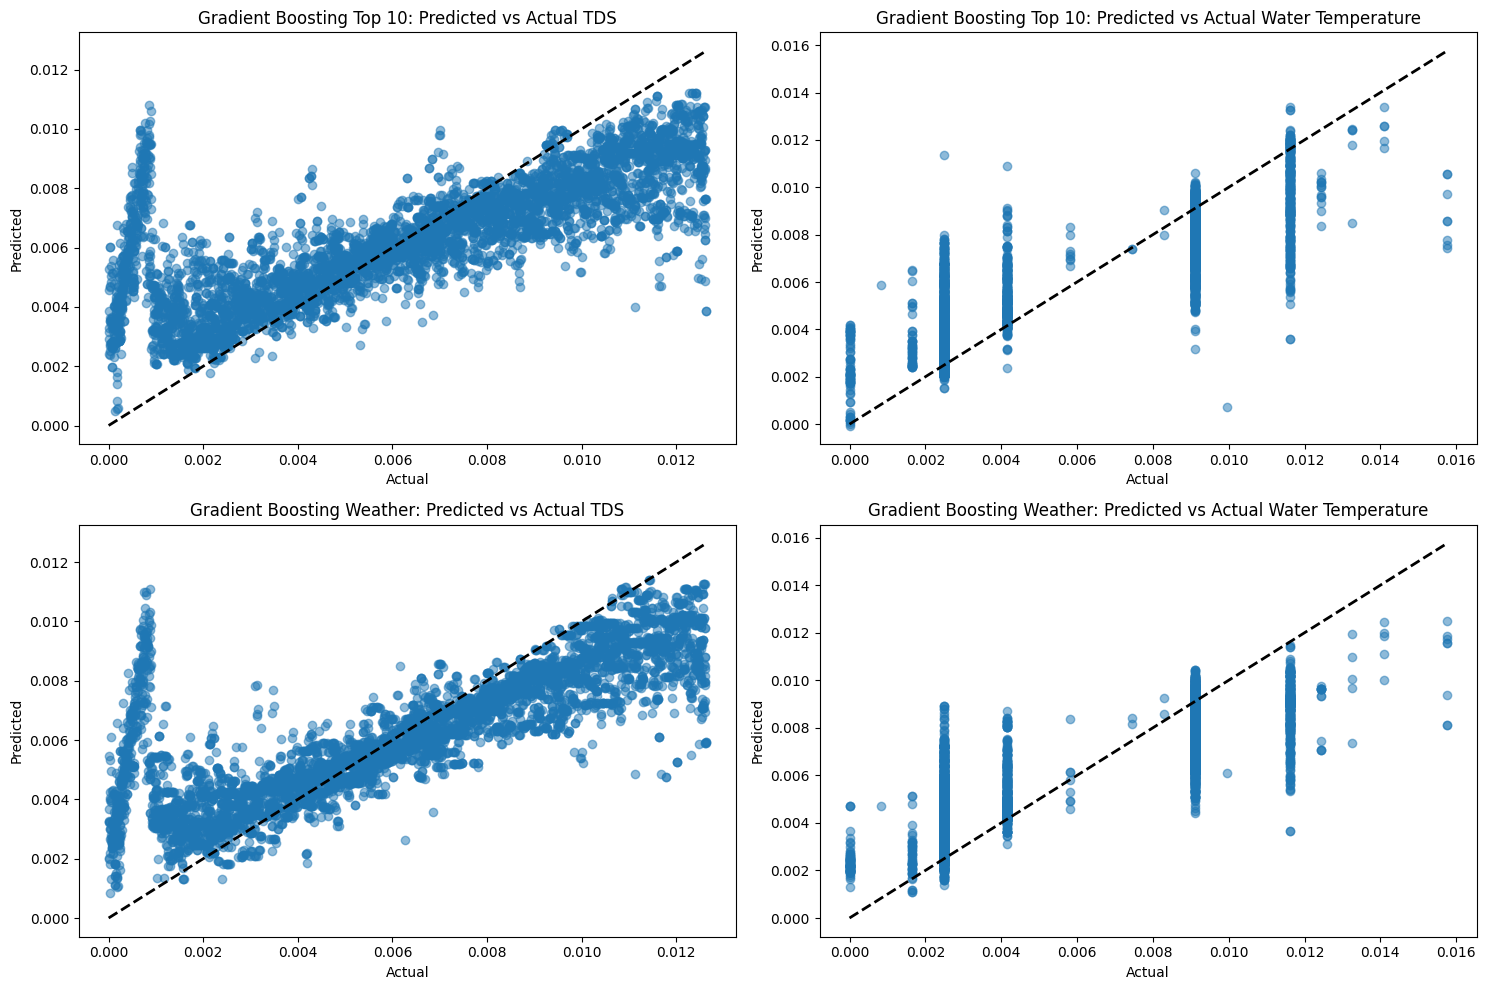

In [161]:
import matplotlib.pyplot as plt

# Assuming you have predictions as y_pred_gb_top10, y_pred_gb_weather, etc. for Gradient Boosting

plt.figure(figsize=(15, 10))  # Adjust the figure size as needed

# Gradient Boosting using Top 10 Features
plt.subplot(2, 2, 1)
plt.scatter(y_test['TDS'], y_pred_gb_tds_top10, alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Gradient Boosting Top 10: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 2, 2)
plt.scatter(y_test['Water Temperature'], y_pred_gb_temp_top10, alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Gradient Boosting Top 10: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Gradient Boosting using Weather-Related Features
plt.subplot(2, 2, 3)
plt.scatter(y_test['TDS'], y_pred_gb_tds_precip, alpha=0.5)
plt.plot([min(y_test['TDS']), max(y_test['TDS'])], [min(y_test['TDS']), max(y_test['TDS'])], 'k--', lw=2)
plt.title('Gradient Boosting Weather: Predicted vs Actual TDS')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(2, 2, 4)
plt.scatter(y_test['Water Temperature'], y_pred_gb_temp_precip, alpha=0.5)
plt.plot([min(y_test['Water Temperature']), max(y_test['Water Temperature'])], [min(y_test['Water Temperature']), max(y_test['Water Temperature'])], 'k--', lw=2)
plt.title('Gradient Boosting Weather: Predicted vs Actual Water Temperature')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()


There is a data preprocessing issue so before doing validation and hyperparameter tuning, rerun the whole data preprocessing with scaling and normalization. We will be dropping DT and focus on RF and GB for our models

In [162]:
final_df = final_df_copy
final_df.shape

(1890836, 44)

In [163]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, normalize

def scale_and_normalize(df):
    """
    Scales and normalizes a given DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame to be scaled and normalized.
    
    Returns:
    DataFrame: A new DataFrame that is scaled and normalized.
    """
    
    # Initialize the LabelEncoder
    le = LabelEncoder()
    
    # Separate numeric and non-numeric columns
    numeric_columns = df.select_dtypes(include=['number'])
    non_numeric_columns = df.select_dtypes(exclude=['number'])
    
    # Apply LabelEncoder to each non-numeric column and store in a new DataFrame
    encoded_columns = non_numeric_columns.apply(lambda col: le.fit_transform(col.astype(str)))
    
    # Concatenate the numeric columns and encoded columns
    df_processed = pd.concat([numeric_columns, encoded_columns], axis=1)
    
    # Apply MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df_processed)
    
    # Convert scaled data back to a DataFrame
    scaled_df = pd.DataFrame(scaled_data, columns=df_processed.columns)
    
    # Normalize the scaled data
    normalized_data = normalize(scaled_df, axis=0)
    
    # Convert normalized data back to a DataFrame
    normalized_df = pd.DataFrame(normalized_data, columns=scaled_df.columns)
    
    return normalized_df

# Usage:
# Assuming final_df is your original DataFrame
final_df = scale_and_normalize(final_df)

### This is a function to handle the outliers to hopefully get rid of the diagonal offset line

In [164]:
def handle_outliers(df, column, method='IQR'):
    if method == 'IQR':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif method == 'std':
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply to your DataFrame
final_df = handle_outliers(final_df, 'TDS', method='IQR')

In [165]:
final_df = final_df.sample(frac=0.01)

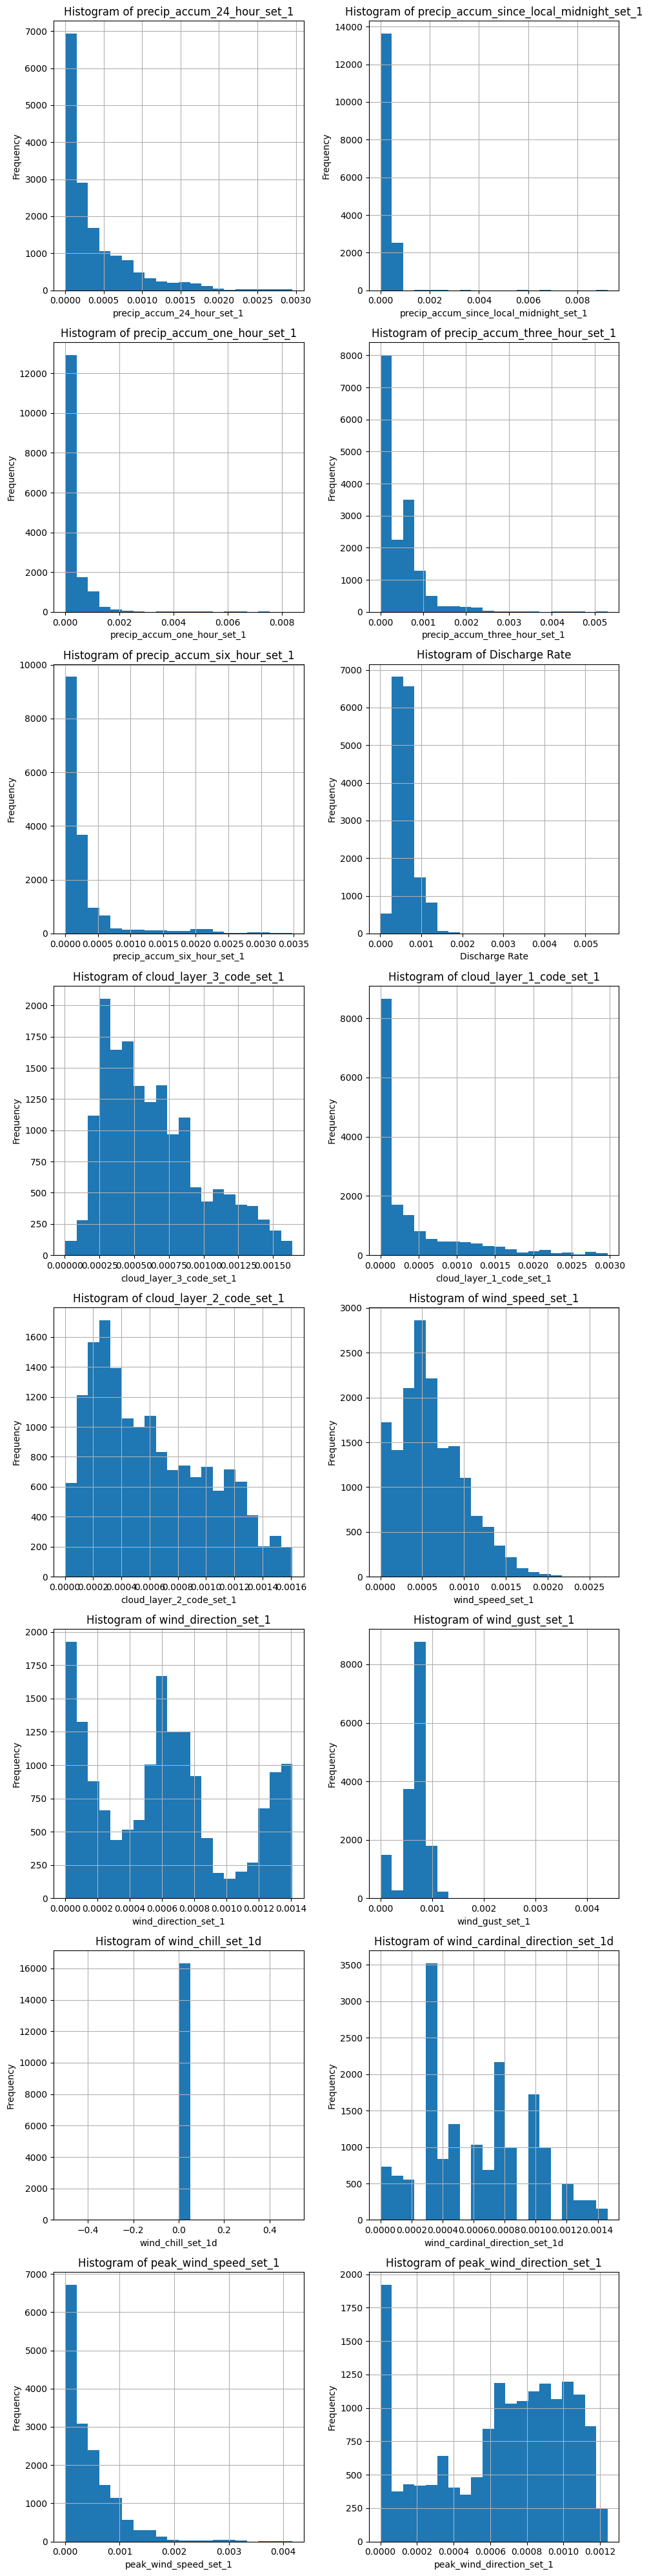

In [166]:
import matplotlib.pyplot as plt

# Assuming weather_related_features is your list of features related to weather
num_features = len(weather_related_features)

# Determine the number of rows required for subplots
rows = int(num_features / 2) if num_features % 2 == 0 else int(num_features / 2) + 1

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10, 5 * rows))

for i, column in enumerate(weather_related_features):
    if column in final_df.columns and final_df[column].dtype.kind in 'biufc':  # Check if the column is numeric
        ax = axes[i // 2, i % 2]  # Determine the position of the subplot
        final_df[column].hist(bins=20, ax=ax)  # Plot the histogram on the designated subplot
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


#### This dataset is still unbalanced either because of the highly localized data, the bad data from the TDS sensor, and not properly merging the dataset into one dataframe

#### We will still be using RF and GB models but only for the top10 features because those models performed better than the precip feature selection. (The model is losing MSE becuase of taking away features, scaling data, and normalization).

##### We will be using RandomizedSearchCV and GridSearchCV

##### After that, run the models again with the best parameters for the top10 features

#### Base models with precip features after dataset is normailized and scaled

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Assuming final_df is your DataFrame
# Assuming weather_related_features is your list of features related to weather

# Select only the weather-related features from your DataFrame
X = final_df[weather_related_features]

# If any of the weather-related features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Training the model
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf_precip = regressor.predict(X_test)

# Computing the performance metrics
mse_rf_tds_precip = mean_squared_error(y_test['TDS'], y_pred_rf_precip[:, 0])
mse_rf_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_rf_precip[:, 1])
r2_rf_tds_precip = r2_score(y_test['TDS'], y_pred_rf_precip[:, 0])
r2_rf_temp_precip = r2_score(y_test['Water Temperature'], y_pred_rf_precip[:, 1])
mae_rf_tds_precip = mean_absolute_error(y_test['TDS'], y_pred_rf_precip[:, 0])
mae_rf_temp_precip = mean_absolute_error(y_test['Water Temperature'], y_pred_rf_precip[:, 1])
rmse_rf_tds_precip = mean_squared_error(y_test['TDS'], y_pred_rf_precip[:, 0], squared=False)
rmse_rf_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_rf_precip[:, 1], squared=False)

# Print the performance metrics
print(f"Random Forest - Mean Squared Error for TDS: {mse_rf_tds_precip}")
print(f"Random Forest - Mean Squared Error for Water Temperature: {mse_rf_temp_precip}")
print(f"Random Forest - R^2 Score for TDS: {r2_rf_tds_precip}")
print(f"Random Forest - R^2 Score for Water Temperature: {r2_rf_temp_precip}")
print(f"Random Forest - Mean Absolute Error for TDS: {mae_rf_tds_precip}")
print(f"Random Forest - Mean Absolute Error for Water Temperature: {mae_rf_temp_precip}")
print(f"Random Forest - Root Mean Squared Error for TDS: {rmse_rf_tds_precip}")
print(f"Random Forest - Root Mean Squared Error for Water Temperature: {rmse_rf_temp_precip}")


Random Forest - Mean Squared Error for TDS: 3.9391361154646957e-11
Random Forest - Mean Squared Error for Water Temperature: 2.8312515972887203e-12
Random Forest - R^2 Score for TDS: 0.8935599139099953
Random Forest - R^2 Score for Water Temperature: 0.9373746831630695
Random Forest - Mean Absolute Error for TDS: 2.0343669888608087e-06
Random Forest - Mean Absolute Error for Water Temperature: 6.96673124899713e-07
Random Forest - Root Mean Squared Error for TDS: 6.276253751613852e-06
Random Forest - Root Mean Squared Error for Water Temperature: 1.6826323416862997e-06


In [168]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

# Assuming final_df is your DataFrame
# Assuming weather_related_features is your list of features related to weather

# Select only the weather-related features from your DataFrame
X = final_df[weather_related_features]

# If any of the weather-related features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y = final_df[['TDS', 'Water Temperature']]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting for 'TDS' prediction
gb_model_tds = GradientBoostingRegressor()
y_train_tds = y_train['TDS']  # Select 'TDS' as the target variable
gb_model_tds.fit(X_train, y_train_tds)
y_pred_gb_tds_precip = gb_model_tds.predict(X_test)

# Gradient Boosting for 'Water Temperature' prediction
gb_model_temp = GradientBoostingRegressor()
y_train_temp = y_train['Water Temperature']  # Select 'Water Temperature' as the target variable
gb_model_temp.fit(X_train, y_train_temp)
y_pred_gb_temp_precip = gb_model_temp.predict(X_test)

# Computing the performance metrics
mse_gb_tds_precip = mean_squared_error(y_test['TDS'], y_pred_gb_tds_precip)
mse_gb_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp_precip)
r2_gb_tds_precip = r2_score(y_test['TDS'], y_pred_gb_tds_precip)
r2_gb_temp_precip = r2_score(y_test['Water Temperature'], y_pred_gb_temp_precip)
mae_gb_tds_precip = mean_absolute_error(y_test['TDS'], y_pred_gb_tds_precip)
mae_gb_temp_precip = mean_absolute_error(y_test['Water Temperature'], y_pred_gb_temp_precip)
rmse_gb_tds_precip = mean_squared_error(y_test['TDS'], y_pred_gb_tds_precip, squared=False)
rmse_gb_temp_precip = mean_squared_error(y_test['Water Temperature'], y_pred_gb_temp_precip, squared=False)

# Print the performance metrics
print(f"Gradient Boosting - Mean Squared Error for TDS: {mse_gb_tds_precip}")
print(f"Gradient Boosting - Mean Squared Error for Water Temperature: {mse_gb_temp_precip}")
print(f"Gradient Boosting - R^2 Score for TDS: {r2_gb_tds_precip}")
print(f"Gradient Boosting - R^2 Score for Water Temperature: {r2_gb_temp_precip}")
print(f"Gradient Boosting - Mean Absolute Error for TDS: {mae_gb_tds_precip}")
print(f"Gradient Boosting - Mean Absolute Error for Water Temperature: {mae_gb_temp_precip}")
print(f"Gradient Boosting - Root Mean Squared Error for TDS: {rmse_gb_tds_precip}")
print(f"Gradient Boosting - Root Mean Squared Error for Water Temperature: {rmse_gb_temp_precip}")


Gradient Boosting - Mean Squared Error for TDS: 7.763077314411581e-11
Gradient Boosting - Mean Squared Error for Water Temperature: 1.3871087607496065e-11
Gradient Boosting - R^2 Score for TDS: 0.7902325298114629
Gradient Boosting - R^2 Score for Water Temperature: 0.6931811863261699
Gradient Boosting - Mean Absolute Error for TDS: 5.277303113895756e-06
Gradient Boosting - Mean Absolute Error for Water Temperature: 2.607887207399724e-06
Gradient Boosting - Root Mean Squared Error for TDS: 8.810832715703766e-06
Gradient Boosting - Root Mean Squared Error for Water Temperature: 3.7243909042279737e-06


In [169]:
# Select only the weather-related features from your DataFrame
X = final_df[weather_related_features]

# If any of the weather-related features are non-numeric, encode them
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Define the target variables
y_tds = final_df['TDS']
y_temp = final_df['Water Temperature']

# Splitting the data
X_train_tds, X_test_tds, y_train_tds, y_test_tds = train_test_split(X, y_tds, test_size=0.3, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.3, random_state=42)

In [170]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']  # Changed 'auto' to 'sqrt'
}

# K-Fold Cross-Validation setup
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=k_fold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    error_score='raise'  # Raises an error on fit failures
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Save the best model from GridSearchCV
best_rf_grid = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': sp_randint(100, 400),
    'max_depth': sp_randint(10, 50),
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 5),
    'max_features': ['sqrt']
    # Add other parameters if needed
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Number of iterations
    cv=k_fold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Save the best model from RandomizedSearchCV
best_rf_random = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


##### We now need to edit the hyperparameter tuning methods to do a K-fold cross validation, after that our main model (RF) should be close or better than our previous models and the GB model

In [ ]:
X_train_tds, X_test_tds, y_train_tds, y_test_tds = train_test_split(X, y['TDS'], test_size=0.3, random_state=42)
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y['Water Temperature'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GridSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    # Add other parameters as needed
}

# K-Fold Cross-Validation setup
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup for TDS
gb_grid_search_tds = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gb_param_grid,
    cv=k_fold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV for TDS
gb_grid_search_tds.fit(X_train_tds, y_train_tds)  # Use y_train_tds
best_gb_grid_tds = gb_grid_search_tds.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for GridSearchCV
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    # Add other parameters as needed
}

# K-Fold Cross-Validation setup
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup for TDS
gb_grid_search_temp = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gb_param_grid,
    cv=k_fold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV for TDS
gb_grid_search_temp.fit(X_train_temp, y_train_temp)  # Use y_train_tds
best_gb_grid_temp = gb_grid_search_temp.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# Computing the performance metrics
mse_best_gb_tds_precip = mean_squared_error(y_test['TDS'], best_gb_grid_tds.predict(X_test_tds))
mse_best_gb_temp_precip = mean_squared_error(y_test['Water Temperature'], best_gb_grid_temp.predict(X_test_temp))
r2_best_gb_tds_precip = r2_score(y_test['TDS'], best_gb_grid_tds.predict(X_test_tds))
r2_best_gb_temp_precip = r2_score(y_test['Water Temperature'], best_gb_grid_temp.predict(X_test_temp))
mae_best_gb_tds_precip = mean_absolute_error(y_test['TDS'], best_gb_grid_tds.predict(X_test_tds))
mae_best_gb_temp_precip = mean_absolute_error(y_test['Water Temperature'], best_gb_grid_temp.predict(X_test_temp))
rmse_best_gb_tds_precip = mean_squared_error(y_test['TDS'], best_gb_grid_tds.predict(X_test_tds), squared=False)
rmse_best_gb_temp_precip = mean_squared_error(y_test['Water Temperature'], best_gb_grid_temp.predict(X_test_temp), squared=False)

In [ ]:
# Print the performance metrics
print(f"Best Gradient Boosting Grid Search - Mean Squared Error for TDS: {mse_best_gb_tds_precip}")
print(f"Best Gradient Boosting Grid Search - Mean Squared Error for Water Temperature: {mse_best_gb_temp_precip}")
print(f"Best Gradient Boosting Grid Search - R^2 Score for TDS: {r2_best_gb_tds_precip}")
print(f"Best Gradient Boosting Grid Search - R^2 Score for Water Temperature: {r2_best_gb_temp_precip}")
print(f"Best Gradient Boosting Grid Search - Mean Absolute Error for TDS: {mae_best_gb_tds_precip}")
print(f"Best Gradient Boosting Grid Search - Mean Absolute Error for Water Temperature: {mae_best_gb_temp_precip}")
print(f"Best Gradient Boosting Grid Search - Root Mean Squared Error for TDS: {rmse_best_gb_tds_precip}")
print(f"Best Gradient Boosting Grid Search - Root Mean Squared Error for Water Temperature: {rmse_best_gb_temp_precip}")

Best Gradient Boosting Grid Search - Mean Squared Error for TDS: 3.8273330719990985e-11
Best Gradient Boosting Grid Search - Mean Squared Error for Water Temperature: 3.5754883327334485e-12
Best Gradient Boosting Grid Search - R^2 Score for TDS: 0.8983310486221247
Best Gradient Boosting Grid Search - R^2 Score for Water Temperature: 0.9205099982892326
Best Gradient Boosting Grid Search - Mean Absolute Error for TDS: 2.8432119321261014e-06
Best Gradient Boosting Grid Search - Mean Absolute Error for Water Temperature: 1.0756979904419463e-06
Best Gradient Boosting Grid Search - Root Mean Squared Error for TDS: 6.186544327812659e-06
Best Gradient Boosting Grid Search - Root Mean Squared Error for Water Temperature: 1.8908961718543534e-06


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter distribution for RandomizedSearchCV
gb_param_dist = {
    'n_estimators': sp_randint(100, 400),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': sp_randint(3, 6),
    # Add other parameters as needed
}

# RandomizedSearchCV setup
gb_random_search_tds = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=k_fold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
gb_random_search_tds.fit(X_train_tds, y_train_tds)  # Use y_train_tds or y_train_temp based on target

# Save the best model from RandomizedSearchCV
best_gb_random_tds = gb_random_search_tds.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter distribution for RandomizedSearchCV
gb_param_dist = {
    'n_estimators': sp_randint(100, 400),
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': sp_randint(3, 6),
    # Add other parameters as needed
}

# RandomizedSearchCV setup
gb_random_search_temp = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=k_fold,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
gb_random_search_temp.fit(X_train_temp, y_train_temp)  # Use y_train_tds or y_train_temp based on target

# Save the best model from RandomizedSearchCV
best_gb_random_temp = gb_random_search_temp.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


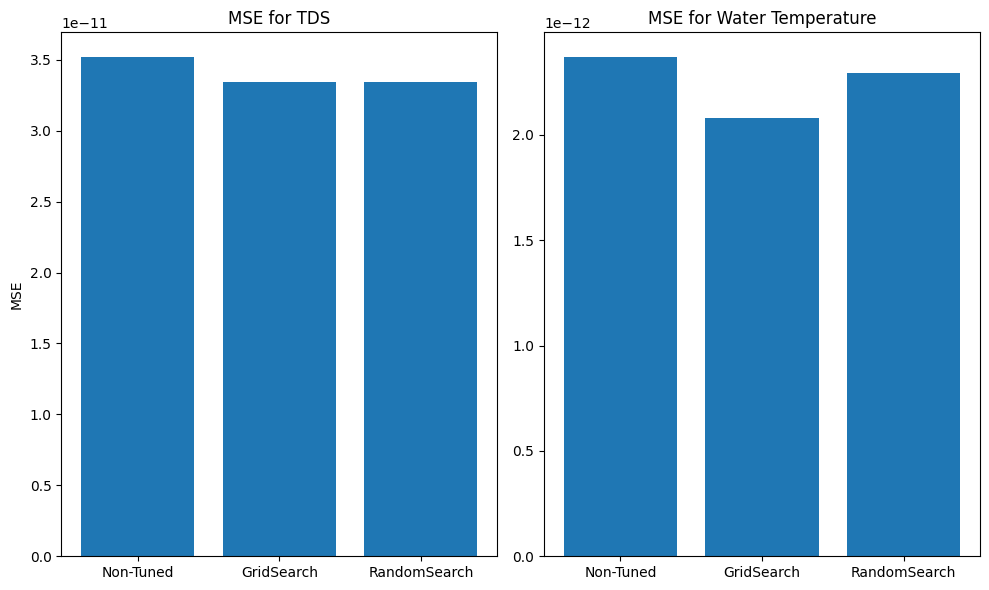

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming y_test, best_rf_grid, and best_rf_random models are defined

# Predict and compute MSE for the best models from GridSearchCV and RandomizedSearchCV
y_pred_best_grid = best_rf_grid.predict(X_test)
y_pred_best_random = best_rf_random.predict(X_test)

# Compute MSE for TDS and Water Temperature
mse_best_grid_tds = mean_squared_error(y_test['TDS'], y_pred_best_grid[:, 0])
mse_best_grid_temp = mean_squared_error(y_test['Water Temperature'], y_pred_best_grid[:, 1])
mse_best_random_tds = mean_squared_error(y_test['TDS'], y_pred_best_random[:, 0])
mse_best_random_temp = mean_squared_error(y_test['Water Temperature'], y_pred_best_random[:, 1])

# Plotting MSE for TDS and Water Temperature
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(['Non-Tuned', 'GridSearch', 'RandomSearch'], [mse_rf_tds_precip, mse_best_grid_tds, mse_best_random_tds])
plt.title('MSE for TDS')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.bar(['Non-Tuned', 'GridSearch', 'RandomSearch'], [mse_rf_temp_precip, mse_best_grid_temp, mse_best_random_temp])
plt.title('MSE for Water Temperature')
plt.tight_layout()
plt.show()


In [ ]:
# Compare MSE scores to select the best RF model
mse_scores = {
    'Non-Tuned': mse_rf_tds_precip + mse_rf_temp_precip,
    'GridSearch': mse_best_grid_tds + mse_best_grid_temp,
    'RandomSearch': mse_best_random_tds + mse_best_random_temp
}

# Find the model with the lowest combined MSE
best_model_key = min(mse_scores, key=mse_scores.get)
RF_ABS_BEST_MODEL = {'Non-Tuned': regressor, 'GridSearch': best_rf_grid, 'RandomSearch': best_rf_random}[best_model_key]

# Print the best model information
print(f"The best RF model is: {best_model_key} with combined MSE: {mse_scores[best_model_key]}")


The best RF model is: GridSearch with combined MSE: 3.5515514708598707e-11


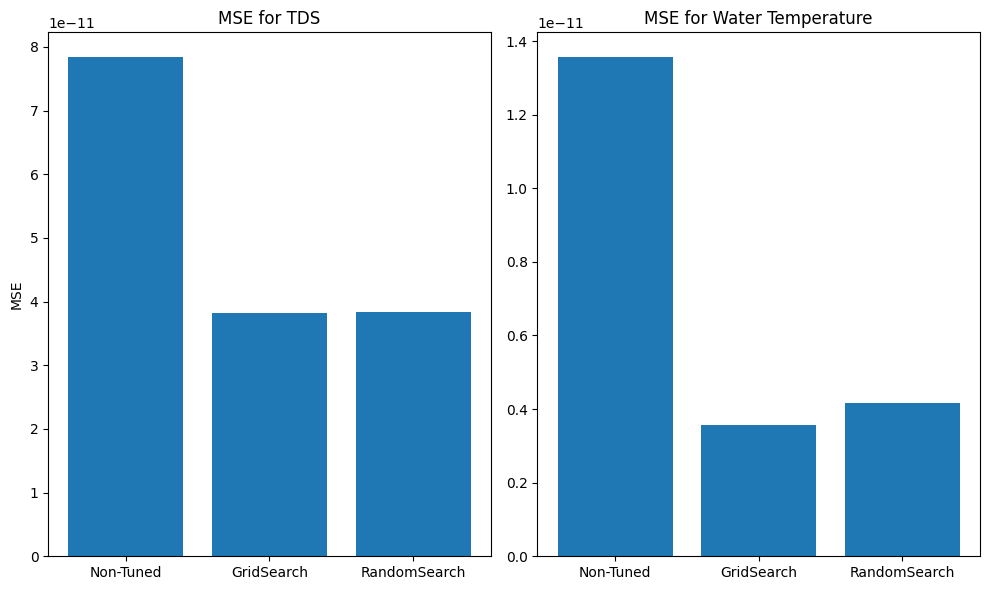

In [ ]:
# Compute MSE for each model and target variable
mse_non_gb_tuned_tds = mean_squared_error(y_test_tds, y_pred_gb_tds_precip)
mse_non_gb_tuned_temp = mean_squared_error(y_test_temp, y_pred_gb_temp_precip)
mse_best_gb_grid_tds = mean_squared_error(y_test_tds, best_gb_grid_tds.predict(X_test_tds))
mse_best_gb_grid_temp = mean_squared_error(y_test_temp, best_gb_grid_temp.predict(X_test_temp))
mse_best_gb_random_tds = mean_squared_error(y_test_tds, best_gb_random_tds.predict(X_test_tds))
mse_best_gb_random_temp = mean_squared_error(y_test_temp, best_gb_random_temp.predict(X_test_temp))

# Combine the MSE for TDS and Water Temperature for each model type
combined_mse_non_tuned = mse_non_gb_tuned_tds + mse_non_gb_tuned_temp
combined_mse_grid = mse_best_gb_grid_tds + mse_best_gb_grid_temp
combined_mse_random = mse_best_gb_random_tds + mse_best_gb_random_temp

# Plotting
plt.figure(figsize=(10, 6))

# Plot for TDS
plt.subplot(1, 2, 1)
plt.bar(['Non-Tuned', 'GridSearch', 'RandomSearch'], 
        [mse_non_gb_tuned_tds, mse_best_gb_grid_tds, mse_best_gb_random_tds])
plt.title('MSE for TDS')
plt.ylabel('MSE')

# Plot for Water Temperature
plt.subplot(1, 2, 2)
plt.bar(['Non-Tuned', 'GridSearch', 'RandomSearch'], 
        [mse_non_gb_tuned_temp, mse_best_gb_grid_temp, mse_best_gb_random_temp])
plt.title('MSE for Water Temperature')

plt.tight_layout()
plt.show()

In [ ]:
# Compare the combined MSE scores and select the best model
gb_mse_scores = {
    'Non-Tuned GB': combined_mse_non_tuned,
    'GridSearch GB': combined_mse_grid,
    'RandomSearch GB': combined_mse_random
}

best_gb_model_key = min(gb_mse_scores, key=gb_mse_scores.get)

# Print the best model information
print(f"The best Gradient Boosting model is: {best_gb_model_key} with combined MSE: {gb_mse_scores[best_gb_model_key]}")


The best Gradient Boosting model is: GridSearch GB with combined MSE: 4.1848819052724434e-11


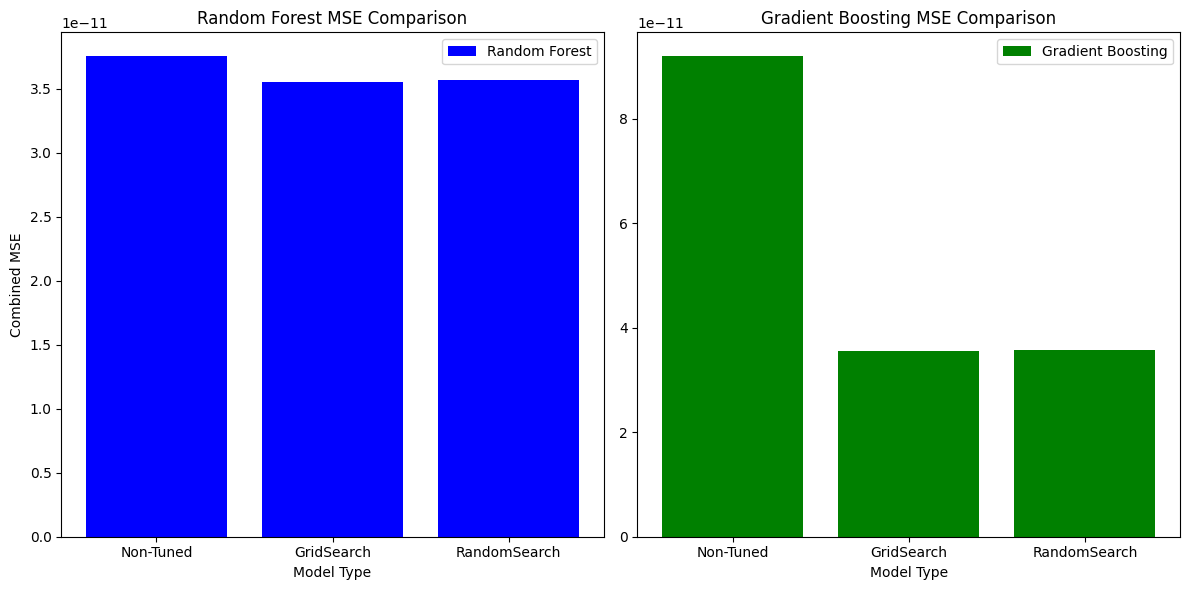

In [ ]:
import matplotlib.pyplot as plt

# Assuming mse_rf_tds_precip, mse_rf_temp_precip, mse_best_rf_grid, mse_best_rf_random are defined
# Assuming mse_best_gb_grid_tds, mse_best_gb_grid_temp, mse_best_gb_random_tds, mse_best_gb_random_temp are defined

# Combined MSE for the best RF models (using combined predictions for TDS and Water Temperature)
combined_mse_rf = [mse_rf_tds_precip + mse_rf_temp_precip,  # Non-Tuned RF model
                   mse_best_grid_tds + mse_best_grid_temp,  # GridSearch RF model
                   mse_best_random_tds + mse_best_random_temp]  # RandomSearch RF model

# Combined MSE for the best GB models (using separate models for TDS and Water Temperature)
combined_mse_gb = [mse_gb_tds_precip + mse_gb_temp_precip,  # Non-Tuned GB model
                   mse_best_grid_tds + mse_best_grid_temp,  # GridSearch GB model
                   mse_best_random_tds + mse_best_random_temp]  # RandomSearch GB model

models = ['Non-Tuned', 'GridSearch', 'RandomSearch']

# Creating bar chart for RF and GB
plt.figure(figsize=(12, 6))

# RF MSE Comparison
plt.subplot(1, 2, 1)
plt.bar(models, combined_mse_rf, color='blue', label='Random Forest')
plt.xlabel('Model Type')
plt.ylabel('Combined MSE')
plt.title('Random Forest MSE Comparison')
plt.legend()

# GB MSE Comparison
plt.subplot(1, 2, 2)
plt.bar(models, combined_mse_gb, color='green', label='Gradient Boosting')
plt.xlabel('Model Type')
plt.title('Gradient Boosting MSE Comparison')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Determine the best overall model based on the lowest combined MSE
best_rf_mse = min(combined_mse_rf)
best_gb_mse = min(combined_mse_gb)

overall_best_model = 'Random Forest' if best_rf_mse < best_gb_mse else 'Gradient Boosting'
print(f"The best overall model based on combined MSE is: {overall_best_model}")


The best overall model based on combined MSE is: Gradient Boosting


##### Write a short conclusion here and next steps
The best one seems to be Gradient Boosting using GridSearch

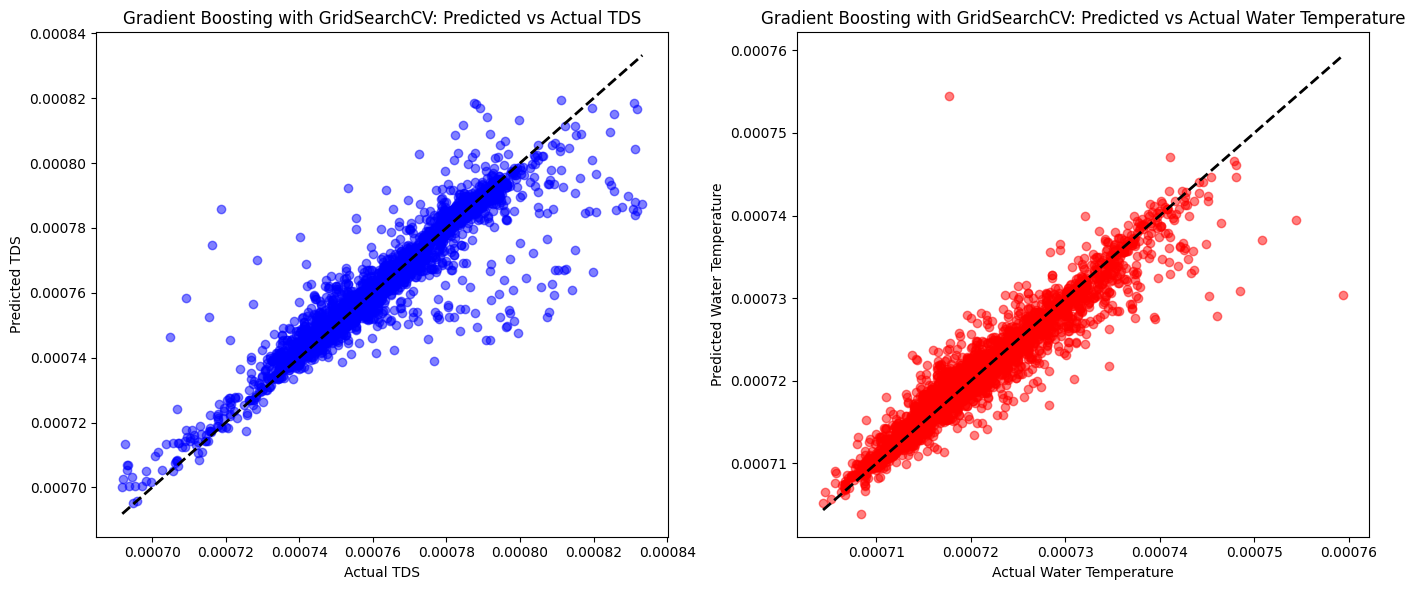

In [ ]:
#Show prediction graph here and metrics for gb_gridsearch
#Remeber, since its GB it's two seperate models one for TDS, the other for water temp
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Plotting the predicted vs actual values for TDS
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_tds, best_gb_grid_tds.predict(X_test_tds), alpha=0.5, color='blue')
plt.plot([min(y_test_tds), max(y_test_tds)], [min(y_test_tds), max(y_test_tds)], 'k--', lw=2)
plt.title('Gradient Boosting with GridSearchCV: Predicted vs Actual TDS')
plt.xlabel('Actual TDS')
plt.ylabel('Predicted TDS')

# Plotting the predicted vs actual values for Water Temperature
plt.subplot(1, 2, 2)
plt.scatter(y_test_temp, best_gb_grid_temp.predict(X_test_temp), alpha=0.5, color='red')
plt.plot([min(y_test_temp), max(y_test_temp)], [min(y_test_temp), max(y_test_temp)], 'k--', lw=2)
plt.title('Gradient Boosting with GridSearchCV: Predicted vs Actual Water Temperature')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')

plt.tight_layout()
plt.show()


ValueError: x and y must be the same size

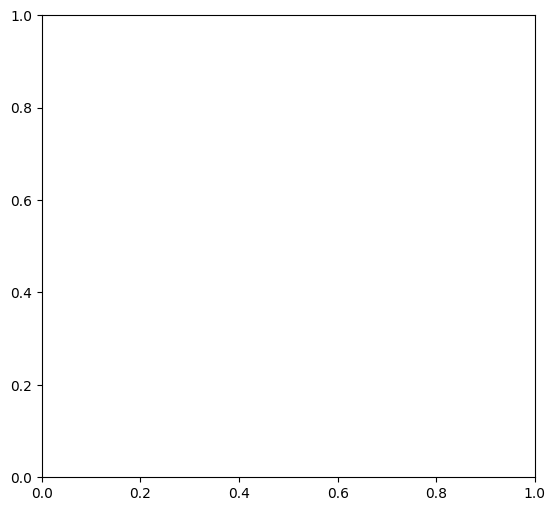

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming rf_model is your non-tuned RandomForestRegressor model
# and it has been trained on your training dataset.

# Plotting the predicted vs actual values for TDS
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
predicted_tds = regressor.predict(X_test)  # Replace X_test_tds with the appropriate test set for TDS
plt.scatter(y_test, predicted_tds, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Random Forest: Predicted vs Actual TDS')
plt.xlabel('Actual TDS')
plt.ylabel('Predicted TDS')

# Plotting the predicted vs actual values for Water Temperature
plt.subplot(1, 2, 2)
predicted_temp = regressor.predict(X_test)  # Replace X_test_temp with the appropriate test set for Water Temperature
plt.scatter(y_test, predicted_temp, alpha=0.5, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.title('Random Forest: Predicted vs Actual Water Temperature')
plt.xlabel('Actual Water Temperature')
plt.ylabel('Predicted Water Temperature')

plt.tight_layout()
plt.show()
